# Import

In [1]:
import numpy as np
import pandas as pd
import copy
from scipy import stats

# Call_def

In [2]:
from ML_preprocessing import (
    read_data,
    columns_info,
    missing_rows,
    Missing_Values_DataFrame,
    Missing_Values_column,
    check_outliers,
    box_plot_seaborn,
    scale_data,
    encode_column,
    calculate_correlation,
    over_under_sampling_classification,
    feature_selection,
    dimensionality_reduction
)

# Load data and Check Duplicated data and drop it

In [3]:
df = read_data('used_cars.csv')
df_used_cars = copy.deepcopy(df)
df_used_cars.head()

the DataFrame dont have any duplicates row
Data read successfully from used_cars.csv


symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   
2                9.0       154.0    5000.0       19          26  16500.0   
3               10.0       102.0    5500.0       24          30  13950.0   
4                8.0       115.0    5500.0       18          22  17450.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  
2    12.368421             Medium       0    1  
3     9.791667             Medium       0    1  
4    13.055556             Medium       0    1  

[5 rows x 29 columns]

In [5]:
df_used_cars.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [4]:
columns_info(df)

names   dtypes  \
0           symboling    int64   
1   normalized-losses    int64   
2                make   object   
3          aspiration   object   
4        num-of-doors   object   
5          body-style   object   
6        drive-wheels   object   
7     engine-location   object   
8          wheel-base  float64   
9              length  float64   
10              width  float64   
11             height  float64   
12        curb-weight    int64   
13        engine-type   object   
14   num-of-cylinders   object   
15        engine-size    int64   
16        fuel-system   object   
17               bore  float64   
18             stroke  float64   
19  compression-ratio  float64   
20         horsepower  float64   
21           peak-rpm  float64   
22           city-mpg    int64   
23        highway-mpg    int64   
24              price  float64   
25       city-L/100km  float64   
26  horsepower-binned   object   
27             diesel    int64   
28                gas    int64   

                                               unique  n_unique  
0                                [3, 1, 2, 0, -1, -2]         6  
1   [122, 164, 158, 192, 188, 121, 98, 81, 118, 14...        51  
2   [alfa-romero, audi, bmw, chevrolet, dodge, hon...        22  
3                                        [std, turbo]         2  
4                                         [two, four]         2  
5     [convertible, hatchback, sedan, wagon, hardtop]         5  
6                                     [rwd, fwd, 4wd]         3  
7                                       [front, rear]         2  
8   [88.6, 94.5, 99.8, 99.4, 105.8, 101.2, 103.5, ...        52  
9   [0.8111484863046613, 0.8226814031715521, 0.848...        73  
10  [0.8902777777777777, 0.9097222222222222, 0.919...        43  
11  [48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 53.7, 56....        49  
12  [2548, 2823, 2337, 2824, 2507, 2844, 2954, 308...       169  
13                  [dohc, ohcv, ohc, l, rotor, ohcf]         6  
14       [four, six, five, three, twelve, two, eight]         7  
15  [130, 152, 109, 136, 131, 108, 164, 209, 61, 9...        43  
16     [mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]         8  
17  [3.47, 2.68, 3.19, 3.13, 3.5, 3.31, 3.62, 2.91...        39  
18  [2.68, 3.47, 3.4, 2.8, 3.19, 3.39, 3.03, 3.11,...        36  
19  [9.0, 10.0, 8.0, 8.5, 8.3, 8.8, 9.5, 9.6, 9.41...        32  
20  [111.0, 154.0, 102.0, 115.0, 110.0, 140.0, 101...        59  
21  [5000.0, 5500.0, 5800.0, 4250.0, 5400.0, 5100....        23  
22  [21, 19, 24, 18, 17, 23, 20, 16, 15, 47, 38, 3...        29  
23  [27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 3...        30  
24  [13495.0, 16500.0, 13950.0, 17450.0, 15250.0, ...       186  
25  [11.190476190476188, 12.36842105263158, 9.7916...        29  
26                           [Medium, Low, High, nan]         3  
27                                             [0, 1]         2  
28                                             [1, 0]         2

# Data Cleaning

## Removing Missing Values

In [6]:
data = {'A': [1, None, 3, 4], 'B': [5, 6, None, 8], 'C': [9, 10, 11, None]}
df = pd.DataFrame(data)
df

A    B     C
0  1.0  5.0   9.0
1  NaN  6.0  10.0
2  3.0  NaN  11.0
3  4.0  8.0   NaN

In [7]:
missing_rows(df)
df

A    B    C
0  1.0  5.0  9.0

In [8]:
missing_rows(df,column_name='A')
df

A    B    C
0  1.0  5.0  9.0

In [9]:
column_name = ['A','B']
missing_rows(df,column_name=column_name)
df

A    B    C
0  1.0  5.0  9.0

## Filling Missing Values without models

### Fill with a constant value

In [10]:
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, np.nan, 3, 4, 5],
    'D': [1, 2, 3, 4, np.nan]
}
df = pd.DataFrame(data)
df

A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  NaN  2.0
2  NaN  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

In [11]:
df_constant = Missing_Values_DataFrame(df, model='constant', constant=0)
df_constant

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation using constant model
Imputation completed using constant model


A    B    C    D
0  1.0  0.0  1.0  1.0
1  2.0  2.0  0.0  2.0
2  0.0  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  0.0

In [12]:
columns = ['A','B']
df_constant_col = Missing_Values_column(df,columns=columns, model='constant', constant=0)
df_constant_col

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation for columns ['A', 'B'] using constant model
Imputation completed for columns ['A', 'B'] using constant model


A    B    C    D
0  1.0  0.0  1.0  1.0
1  2.0  2.0  NaN  2.0
2  0.0  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

### *------------------------------------------------------------------------------------------------------------------*

### Fill with the mean value

In [13]:
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, np.nan, 3, 4, 5],
    'D': [1, 2, 3, 4, np.nan]
}
df = pd.DataFrame(data)
df

A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  NaN  2.0
2  NaN  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

In [14]:
df_mean = Missing_Values_DataFrame(df, model='mean')
df_mean


Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation using mean model
Imputation completed using mean model


A    B     C    D
0  1.0  3.5  1.00  1.0
1  2.0  2.0  3.25  2.0
2  3.0  3.0  3.00  3.0
3  4.0  4.0  4.00  4.0
4  5.0  5.0  5.00  2.5

In [15]:
columns = ['A','B']
df_mean_col = Missing_Values_column(df,columns=columns, model='mean')
df_mean_col


Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation for columns ['A', 'B'] using mean model
Imputation completed for columns ['A', 'B'] using mean model


A    B    C    D
0  1.0  3.5  1.0  1.0
1  2.0  2.0  NaN  2.0
2  3.0  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

### *------------------------------------------------------------------------------------------------------------------*

### Fill with the median value

In [16]:
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, np.nan, 3, 4, 5],
    'D': [1, 2, 3, 4, np.nan]
}
df = pd.DataFrame(data)
df

A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  NaN  2.0
2  NaN  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

In [17]:
df_median = Missing_Values_DataFrame(df, model='median')
df_median

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation using median model
Imputation completed using median model


A    B    C    D
0  1.0  3.5  1.0  1.0
1  2.0  2.0  3.5  2.0
2  3.0  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  2.5

In [18]:
columns = ['A','B']
df_median_col = Missing_Values_column(df,columns= columns , model='median')
df_median_col

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation for columns ['A', 'B'] using median model
Imputation completed for columns ['A', 'B'] using median model


A    B    C    D
0  1.0  3.5  1.0  1.0
1  2.0  2.0  NaN  2.0
2  3.0  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

### *------------------------------------------------------------------------------------------------------------------*

### Fill with the most frequent value (mode)

In [19]:
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, np.nan, 3, 4, 5],
    'D': [1, 2, 3, 4, np.nan]
}
df = pd.DataFrame(data)
df

A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  NaN  2.0
2  NaN  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

In [20]:
df_mode = Missing_Values_DataFrame(df, model='mode')
df_mode

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation using mode model
Imputation completed using mode model


A    B    C    D
0  1.0  2.0  1.0  1.0
1  2.0  2.0  1.0  2.0
2  1.0  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  1.0

In [21]:
columns = ['A','B']
df_mode_col = Missing_Values_column(df,columns=columns, model='mode')
df_mode_col

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation for columns ['A', 'B'] using mode model
Imputation completed for columns ['A', 'B'] using mode model


A    B    C    D
0  1.0  2.0  1.0  1.0
1  2.0  2.0  NaN  2.0
2  1.0  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

### *------------------------------------------------------------------------------------------------------------------*

### Interpolation (linear)

In [22]:
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, np.nan, 3, 4, 5],
    'D': [1, 2, 3, 4, np.nan]
}
df = pd.DataFrame(data)
df

A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  NaN  2.0
2  NaN  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

In [23]:
df_interpolate = Missing_Values_DataFrame(df, model='interpolation')
df_interpolate

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation using interpolation model
Imputation completed using interpolation model


A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  2.0  2.0
2  3.0  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  4.0

In [24]:
columns = ['A','B']
df_interpolate_col = Missing_Values_column(df,columns=columns, model='interpolation')
df_interpolate_col

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation for columns ['A', 'B'] using interpolation model
Imputation completed for columns ['A', 'B'] using interpolation model


A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  NaN  2.0
2  3.0  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

### *------------------------------------------------------------------------------------------------------------------*

### Forward fill (using the previous value)

In [25]:
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, np.nan, 3, 4, 5],
    'D': [1, 2, 3, 4, np.nan]
}
df = pd.DataFrame(data)
df

A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  NaN  2.0
2  NaN  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

In [26]:
df_ffill = Missing_Values_DataFrame(df, model='Forward_fill')
df_ffill

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation using Forward_fill model
Imputation completed using Forward_fill model


A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  1.0  2.0
2  2.0  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  4.0

In [27]:
columns = ['A','B']
df_ffill_col = Missing_Values_column(df,columns=columns, model='Forward_fill')
df_ffill_col

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation for columns ['A', 'B'] using Forward_fill model
Imputation completed for columns ['A', 'B'] using Forward_fill model


A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  NaN  2.0
2  2.0  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

### *------------------------------------------------------------------------------------------------------------------*

### Backward fill (using the next value)

In [28]:
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, np.nan, 3, 4, 5],
    'D': [1, 2, 3, 4, np.nan]
}
df = pd.DataFrame(data)
df

A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  NaN  2.0
2  NaN  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

In [29]:
df_bfill = Missing_Values_DataFrame(df, model='Backward_fill')
df_bfill

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation using Backward_fill model
Imputation completed using Backward_fill model


A    B    C    D
0  1.0  2.0  1.0  1.0
1  2.0  2.0  3.0  2.0
2  4.0  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

In [30]:
columns = ['A','B']
df_bfill_col = Missing_Values_column(df,columns=columns, model='Backward_fill')
df_bfill_col

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation for columns ['A', 'B'] using Backward_fill model
Imputation completed for columns ['A', 'B'] using Backward_fill model


A    B    C    D
0  1.0  2.0  1.0  1.0
1  2.0  2.0  NaN  2.0
2  4.0  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

### *------------------------------------------------------------------------------------------------------------------*

## Filling Missing Values with models

### Simple Imputer
SimpleImputer replaces missing values using a specified strategy. Common strategies include:

- Mean: Replaces missing values with the mean of the column.
- Median: Replaces missing values with the median of the column.
- Most Frequent: Replaces missing values with the most frequent value in the column.
- Constant: Replaces missing values with a constant value provided by the user.

#### Best Use Cases:

- When the data distribution is simple.
- When computational simplicity and speed are needed.
- When missing values are not related to other features.

In [31]:
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, np.nan, 3, 4, 5],
    'D': [1, 2, 3, 4, np.nan]
}
df = pd.DataFrame(data)
df

A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  NaN  2.0
2  NaN  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

In [32]:
SimpleImputer = Missing_Values_DataFrame(df, model='SimpleImputer',strategy='mean',fill_value=None)
SimpleImputer

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation using SimpleImputer model
Imputation completed using SimpleImputer model


A    B     C    D
0  1.0  3.5  1.00  1.0
1  2.0  2.0  3.25  2.0
2  3.0  3.0  3.00  3.0
3  4.0  4.0  4.00  4.0
4  5.0  5.0  5.00  2.5

In [33]:
columns = ['A','B']
SimpleImputer_col = Missing_Values_column(df,columns=columns, model='SimpleImputer',strategy='mean',fill_value=None)
SimpleImputer_col

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation for columns ['A', 'B'] using SimpleImputer model
Imputation completed for columns ['A', 'B'] using SimpleImputer model


A    B    C    D
0  1.0  3.5  1.0  1.0
1  2.0  2.0  NaN  2.0
2  3.0  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

### K-Nearest Neighbors Imputer
KNNImputer uses the k-nearest neighbors approach to impute missing values. It replaces missing values using the mean (or other specified aggregation function) of the nearest k-neighbors found in the dataset.

#### Best Use Cases:

- When the data distribution is more complex.
- When there is an inherent relationship between features.
- When accuracy is more critical than computational efficiency.

In [34]:
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, np.nan, 3, 4, 5],
    'D': [1, 2, 3, 4, np.nan]
}
df = pd.DataFrame(data)
df

A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  NaN  2.0
2  NaN  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

In [35]:
KNNImputer = Missing_Values_DataFrame(df, model='KNNImputer', n_neighbors= 5, weights= 'uniform')
KNNImputer

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation using KNNImputer model
Imputation completed using KNNImputer model


A    B     C    D
0  1.0  3.5  1.00  1.0
1  2.0  2.0  3.25  2.0
2  3.0  3.0  3.00  3.0
3  4.0  4.0  4.00  4.0
4  5.0  5.0  5.00  2.5

In [36]:
columns = ['A','B']
KNNImputer_col = Missing_Values_column(df,columns=columns, model='KNNImputer', n_neighbors= 5, weights= 'uniform')
KNNImputer_col

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation for columns ['A', 'B'] using KNNImputer model
Imputation completed for columns ['A', 'B'] using KNNImputer model


A    B    C    D
0  1.0  3.5  1.0  1.0
1  2.0  2.0  NaN  2.0
2  3.0  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

### Iterative Imputer
The IterativeImputer models each feature with missing values as a function of other features in a round-robin fashion. It uses multivariate imputation by chaining equations and works by modeling missing data points as a function of other features using Bayesian Ridge Regression (or other specified regressors).

#### Best Use Cases:

- When there are complex relationships between features.
- When the dataset is large enough to justify the computational cost.
- When the distribution of missing values is not random (MCAR) but can be explained by other features (MAR).

In [37]:
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, np.nan, 3, 4, 5],
    'D': [1, 2, 3, 4, np.nan]
}
df = pd.DataFrame(data)
df

A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  NaN  2.0
2  NaN  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

In [38]:
iterative_imputer = Missing_Values_DataFrame(df, model='IterativeImputer', max_iter= 10)
iterative_imputer

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation using IterativeImputer model
Imputation completed using IterativeImputer model


A         B         C         D
0  1.0  1.000038  1.000000  1.000000
1  2.0  2.000000  1.999993  2.000000
2  3.0  3.000000  3.000000  3.000000
3  4.0  4.000000  4.000000  4.000000
4  5.0  5.000000  5.000000  5.000006

In [39]:
columns = ['A','B']
iterative_imputer_col = Missing_Values_column(df,columns=columns , model='IterativeImputer', max_iter= 10)
iterative_imputer_col

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation for columns ['A', 'B'] using IterativeImputer model
Imputation completed for columns ['A', 'B'] using IterativeImputer model


A         B    C    D
0  1.000000  1.000088  1.0  1.0
1  2.000000  2.000000  NaN  2.0
2  2.999826  3.000000  3.0  3.0
3  4.000000  4.000000  4.0  4.0
4  5.000000  5.000000  5.0  NaN

In [40]:
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, np.nan, 3, 4, 5],
    'D': [1, 2, 3, 4, np.nan]
}
df = pd.DataFrame(data)
df

A    B    C    D
0  1.0  NaN  1.0  1.0
1  2.0  2.0  NaN  2.0
2  NaN  3.0  3.0  3.0
3  4.0  4.0  4.0  4.0
4  5.0  5.0  5.0  NaN

In [41]:
from sklearn.linear_model import BayesianRidge

iterative_imputer = Missing_Values_DataFrame(df, model='IterativeImputer', estimator=BayesianRidge(), max_iter= 10, tol = 0.01 )
iterative_imputer

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation using IterativeImputer model
Imputation completed using IterativeImputer model


A         B         C         D
0  1.000000  1.000278  1.000000  1.000000
1  2.000000  2.000000  1.999831  2.000000
2  3.001228  3.000000  3.000000  3.000000
3  4.000000  4.000000  4.000000  4.000000
4  5.000000  5.000000  5.000000  4.999887

In [42]:
from sklearn.linear_model import BayesianRidge

columns = ['A','B']
iterative_imputer_col = Missing_Values_column(df, columns=columns, model='IterativeImputer', estimator=BayesianRidge(), max_iter= 10, tol = 0.01 )
iterative_imputer_col

Columns with missing values: ['A', 'B', 'C', 'D']
Starting imputation for columns ['A', 'B'] using IterativeImputer model
Imputation completed for columns ['A', 'B'] using IterativeImputer model


A         B    C    D
0  1.000000  1.000697  1.0  1.0
1  2.000000  2.000000  NaN  2.0
2  2.998608  3.000000  3.0  3.0
3  4.000000  4.000000  4.0  4.0
4  5.000000  5.000000  5.0  NaN

## Comparison

- SimpleImputer is faster and simpler to implement.
- KNNImputer can provide more accurate imputations, especially when there is a relationship between features, but it is computationally more expensive.
- IterativeImputer is more sophisticated and often more accurate in imputing missing values compared to SimpleImputer and KNNImputer.
- IterativeImputer can leverage the information from all features to impute missing values, making it more suitable for datasets where feature interactions are complex.

### *------------------------------------------------------------------------------------------------------------------*

# Check Outliers

In [43]:
outliers_df = check_outliers(df_used_cars)

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
diesel               0
gas                  0
dtype: int64


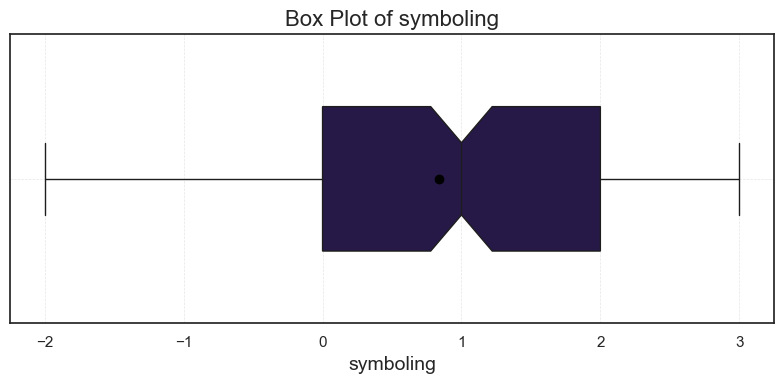

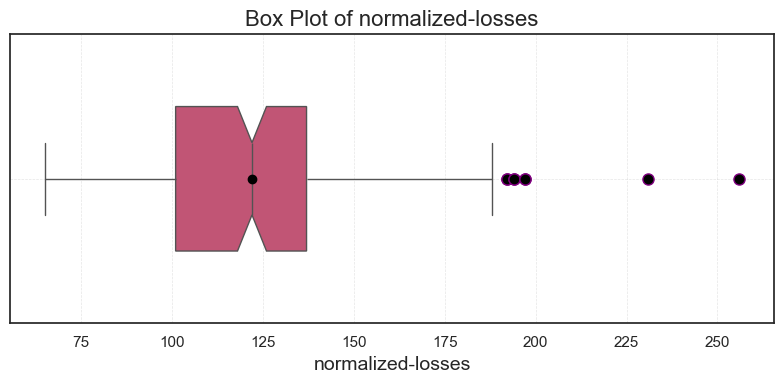

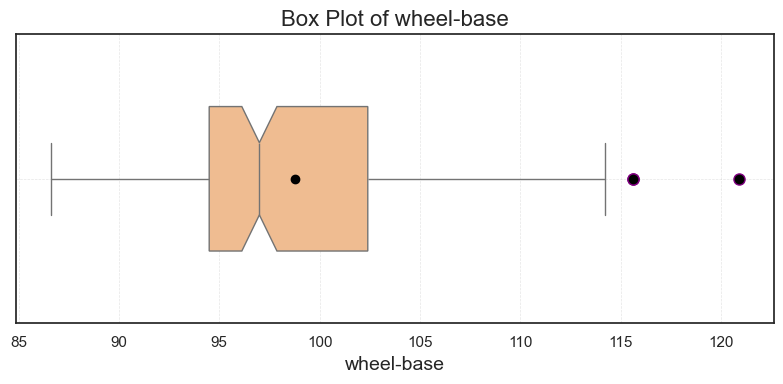

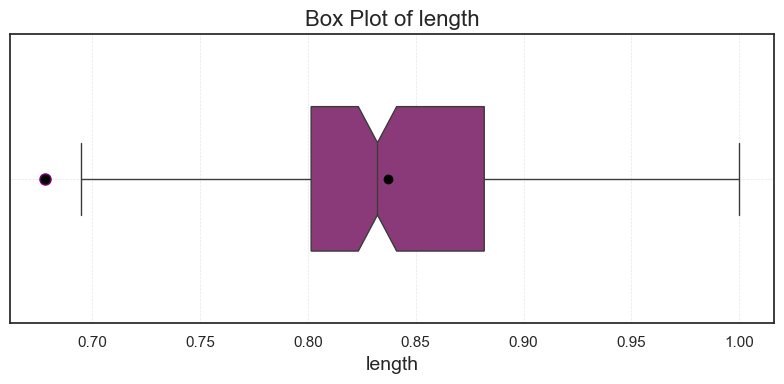

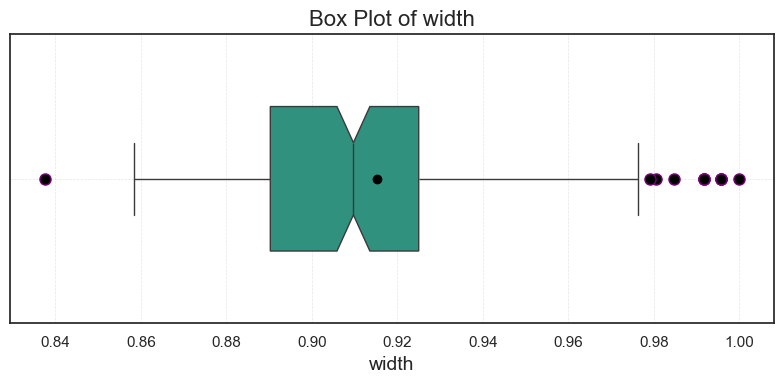

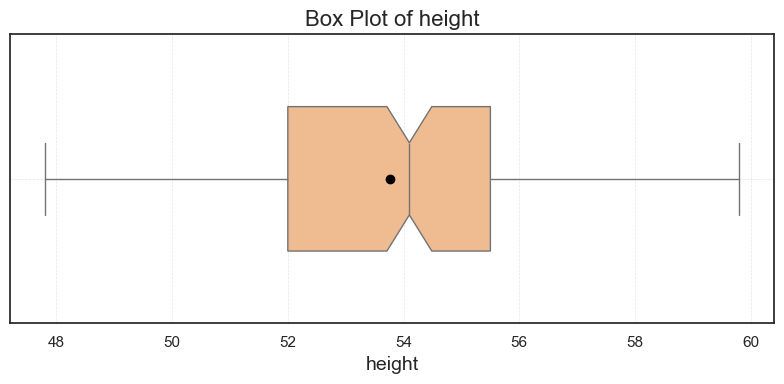

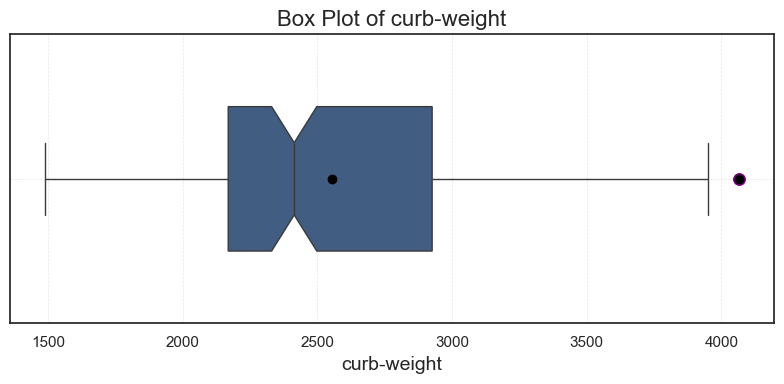

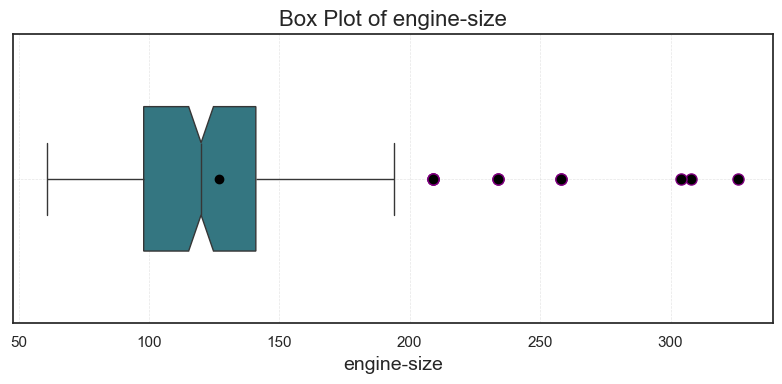

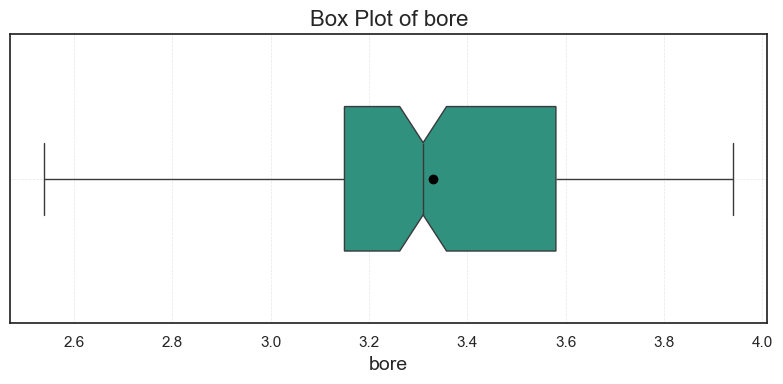

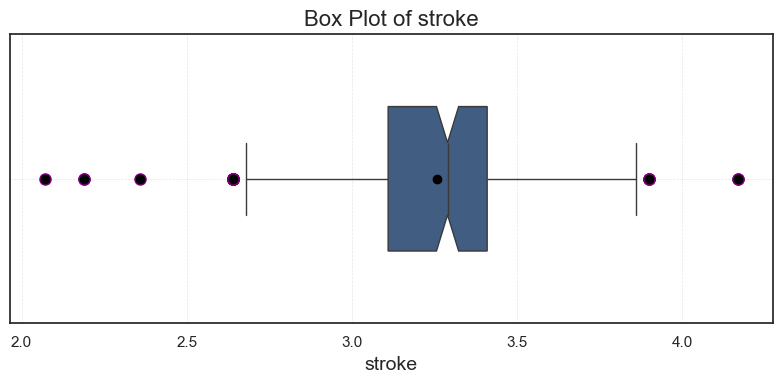

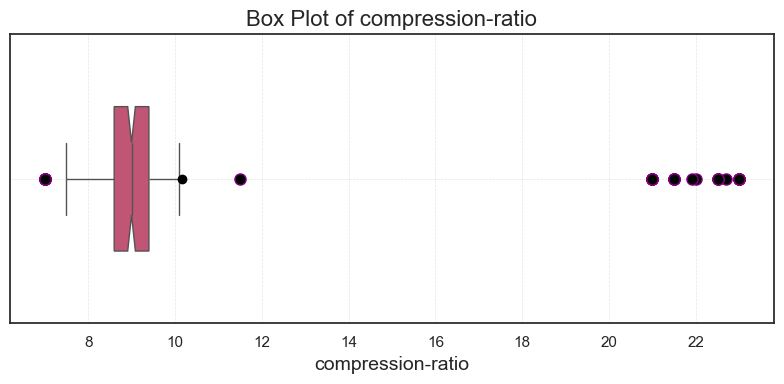

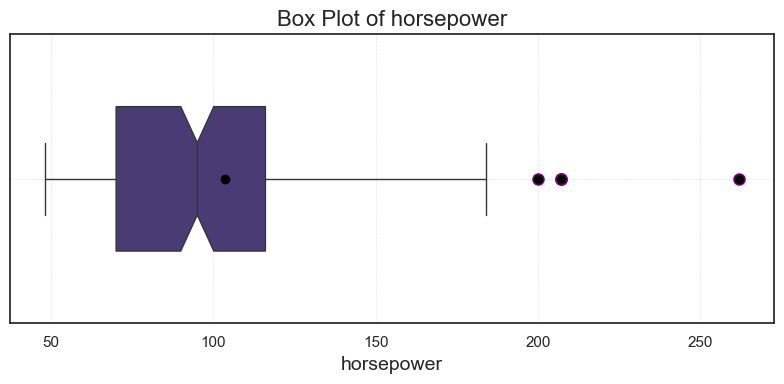

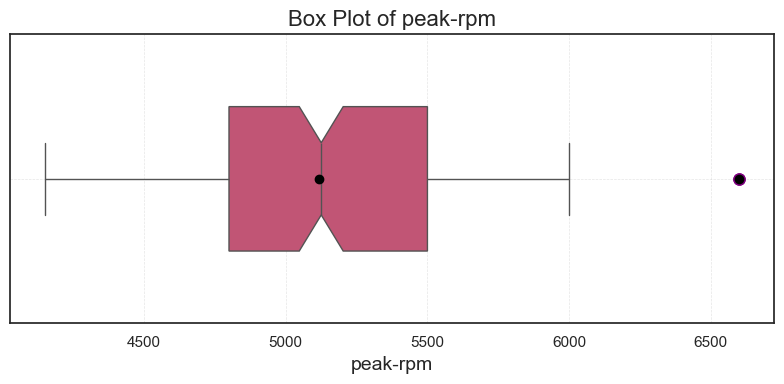

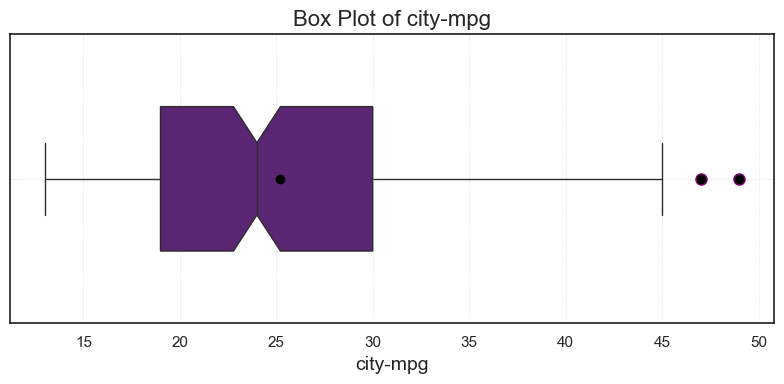

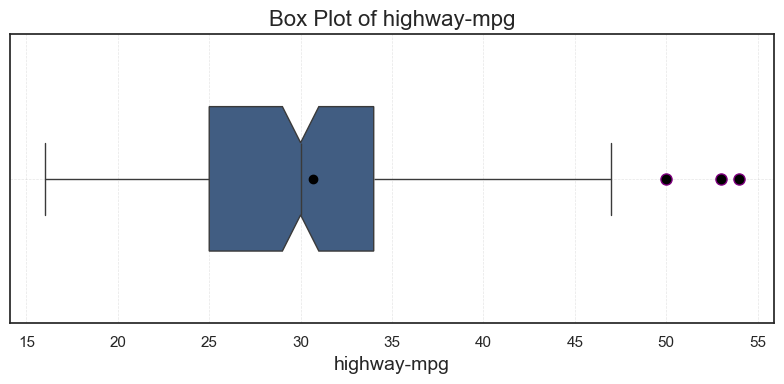

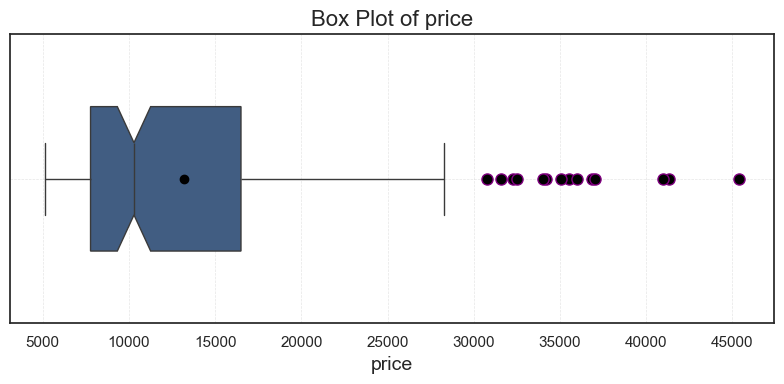

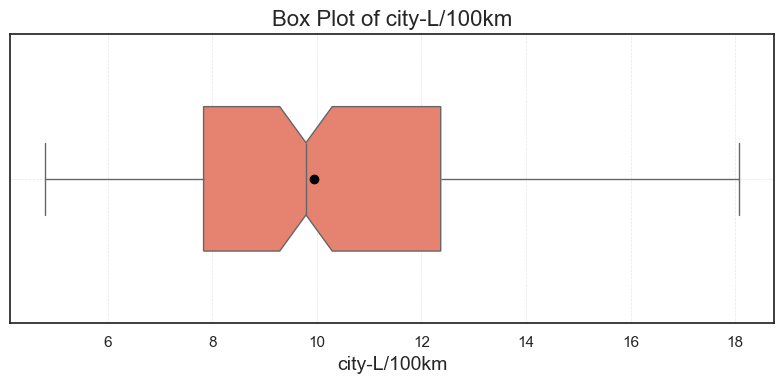

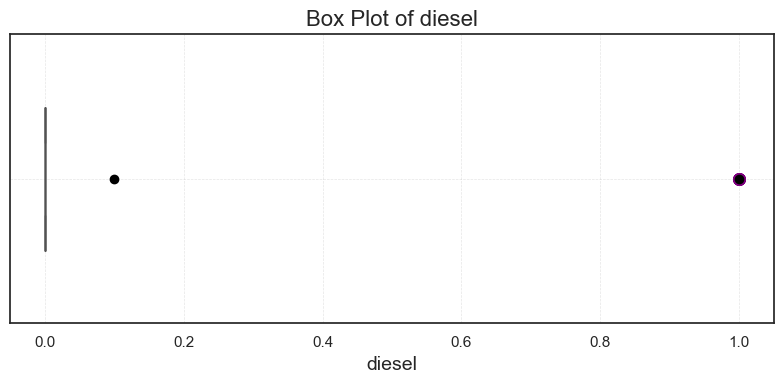

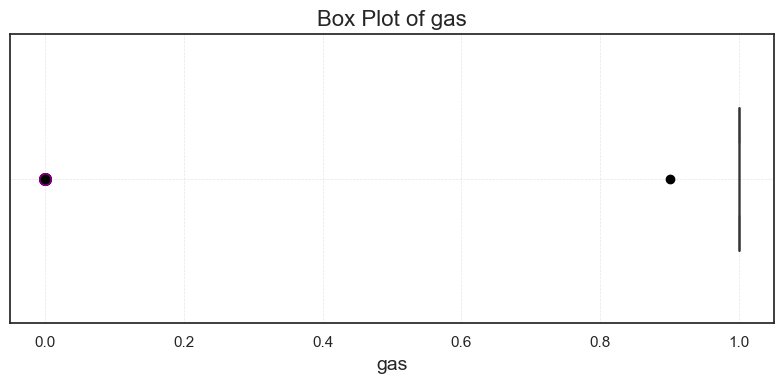

In [44]:
for coloum in outliers_df:
    box_plot_seaborn(data=df_used_cars,x=coloum,orient='y',xlabel=coloum,ylabel=None,title='Box Plot of '+coloum ,figsize=(8,4))

# Data Transformation (Scaling)

In [45]:
from sklearn.datasets import load_iris

data =load_iris()
x = data.data
y = data.target

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
x_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2

## standardization (Z-score normalization)
Standard Scaling transforms the data to have a mean of 0 and a standard deviation of 1.

### Use Case
Useful when the data follows a Gaussian distribution. Algorithms such as linear regression, logistic regression, and SVMs assume or perform better if the data is normally distributed.

In [48]:
x_train_scaled, x_test_scaled= scale_data(x_train=x_train, x_test=x_test, scaler_type='standard')

In [49]:
x_train_scaled

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
       [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
       [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
       [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
       [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
       [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
       [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
       [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
       [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
       [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
       [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
       [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
       [ 0.59831066, -0.

### *------------------------------------------------------------------------------------------------------------------*

## Min-Max Scaling (Normalization)
Min-Max Scaling transforms features by scaling them to a given range, typically 0 to 1 or -1 to 1.

### Use Case
Useful when the data has a bounded range. Algorithms such as KNN and neural networks perform better with normalized data.

In [50]:
x_train_scaled, x_test_scaled= scale_data(x_train=x_train, x_test=x_test, scaler_type='minmax')

In [51]:
x_train_scaled

array([[0.08823529, 0.66666667, 0.        , 0.04166667],
       [0.41176471, 1.        , 0.0877193 , 0.125     ],
       [0.70588235, 0.45833333, 0.59649123, 0.54166667],
       [0.14705882, 0.58333333, 0.10526316, 0.04166667],
       [0.02941176, 0.5       , 0.05263158, 0.04166667],
       [0.58823529, 0.20833333, 0.70175439, 0.75      ],
       [0.61764706, 0.5       , 0.61403509, 0.58333333],
       [0.26470588, 0.625     , 0.0877193 , 0.04166667],
       [0.20588235, 0.66666667, 0.07017544, 0.04166667],
       [0.26470588, 0.875     , 0.0877193 , 0.        ],
       [0.44117647, 0.29166667, 0.71929825, 0.75      ],
       [0.5       , 0.58333333, 0.61403509, 0.625     ],
       [0.70588235, 0.45833333, 0.64912281, 0.58333333],
       [0.32352941, 0.79166667, 0.05263158, 0.125     ],
       [0.32352941, 0.70833333, 0.0877193 , 0.04166667],
       [0.35294118, 0.16666667, 0.47368421, 0.375     ],
       [0.58823529, 0.33333333, 0.71929825, 0.58333333],
       [0.61764706, 0.45833333,

### *------------------------------------------------------------------------------------------------------------------*

## Robust Scaling
Robust Scaling uses the median and the interquartile range (IQR) for scaling, making it robust to outliers.

### Use Case
Useful when the data contains outliers. Unlike Standard Scaling, Robust Scaling reduces the impact of outliers.

In [52]:
x_train_scaled, x_test_scaled= scale_data(x_train=x_train, x_test=x_test, scaler_type='robust')

In [53]:
x_train_scaled

array([[-0.88461538,  1.        , -0.90277778, -0.73333333],
       [-0.03846154,  2.33333333, -0.76388889, -0.6       ],
       [ 0.73076923,  0.16666667,  0.04166667,  0.06666667],
       [-0.73076923,  0.66666667, -0.73611111, -0.73333333],
       [-1.03846154,  0.33333333, -0.81944444, -0.73333333],
       [ 0.42307692, -0.83333333,  0.20833333,  0.4       ],
       [ 0.5       ,  0.33333333,  0.06944444,  0.13333333],
       [-0.42307692,  0.83333333, -0.76388889, -0.73333333],
       [-0.57692308,  1.        , -0.79166667, -0.73333333],
       [-0.42307692,  1.83333333, -0.76388889, -0.8       ],
       [ 0.03846154, -0.5       ,  0.23611111,  0.4       ],
       [ 0.19230769,  0.66666667,  0.06944444,  0.2       ],
       [ 0.73076923,  0.16666667,  0.125     ,  0.13333333],
       [-0.26923077,  1.5       , -0.81944444, -0.6       ],
       [-0.26923077,  1.16666667, -0.76388889, -0.73333333],
       [-0.19230769, -1.        , -0.15277778, -0.2       ],
       [ 0.42307692, -0.

### *------------------------------------------------------------------------------------------------------------------*

## log transformation
Applies the natural logarithm to the data.

### Use Case
Useful when data spans several orders of magnitude or has a skewed distribution.

In [54]:
x_train_scaled, x_test_scaled= scale_data(x_train=x_train, x_test=x_test, scaler_type='log')

In [55]:
x_train_scaled

array([[1.7227666 , 1.5260563 , 0.69314718, 0.18232156],
       [1.90210753, 1.68639895, 0.91629073, 0.33647224],
       [2.04122033, 1.41098697, 1.68639895, 0.87546874],
       [1.75785792, 1.48160454, 0.95551145, 0.18232156],
       [1.68639895, 1.43508453, 0.83290912, 0.18232156],
       [1.98787435, 1.25276297, 1.79175947, 1.06471074],
       [2.00148   , 1.43508453, 1.70474809, 0.91629073],
       [1.82454929, 1.5040774 , 0.91629073, 0.18232156],
       [1.79175947, 1.5260563 , 0.87546874, 0.18232156],
       [1.82454929, 1.62924054, 0.91629073, 0.09531018],
       [1.91692261, 1.30833282, 1.80828877, 1.06471074],
       [1.94591015, 1.48160454, 1.70474809, 0.95551145],
       [2.04122033, 1.41098697, 1.74046617, 0.91629073],
       [1.85629799, 1.58923521, 0.83290912, 0.33647224],
       [1.85629799, 1.54756251, 0.91629073, 0.18232156],
       [1.87180218, 1.22377543, 1.54756251, 0.69314718],
       [1.98787435, 1.33500107, 1.80828877, 0.91629073],
       [2.00148   , 1.41098697,

### *------------------------------------------------------------------------------------------------------------------*

## MaxAbs Scaling
MaxAbs Scaling scales each feature by its maximum absolute value, maintaining the sparsity of the data.

### Use Case
Useful for sparse data such as text data represented in a term-document matrix.

In [56]:
x_train_scaled, x_test_scaled= scale_data(x_train=x_train, x_test=x_test, scaler_type='maxabs')

In [57]:
x_train_scaled

array([[0.5974026 , 0.81818182, 0.14925373, 0.08      ],
       [0.74025974, 1.        , 0.2238806 , 0.16      ],
       [0.87012987, 0.70454545, 0.65671642, 0.56      ],
       [0.62337662, 0.77272727, 0.23880597, 0.08      ],
       [0.57142857, 0.72727273, 0.19402985, 0.08      ],
       [0.81818182, 0.56818182, 0.74626866, 0.76      ],
       [0.83116883, 0.72727273, 0.67164179, 0.6       ],
       [0.67532468, 0.79545455, 0.2238806 , 0.08      ],
       [0.64935065, 0.81818182, 0.20895522, 0.08      ],
       [0.67532468, 0.93181818, 0.2238806 , 0.04      ],
       [0.75324675, 0.61363636, 0.76119403, 0.76      ],
       [0.77922078, 0.77272727, 0.67164179, 0.64      ],
       [0.87012987, 0.70454545, 0.70149254, 0.6       ],
       [0.7012987 , 0.88636364, 0.19402985, 0.16      ],
       [0.7012987 , 0.84090909, 0.2238806 , 0.08      ],
       [0.71428571, 0.54545455, 0.55223881, 0.4       ],
       [0.81818182, 0.63636364, 0.76119403, 0.6       ],
       [0.83116883, 0.70454545,

### *------------------------------------------------------------------------------------------------------------------*

## Quantile Transformation (Uniform Scaling)
Quantile Transformation transforms the features to follow a uniform or normal distribution.

### Use Case
Useful when the data does not follow a Gaussian distribution but needs to be transformed to match a certain distribution.

In [58]:
x_train_scaled, x_test_scaled= scale_data(x_train=x_train, x_test=x_test, scaler_type='quantile')

In [59]:
x_train_scaled

array([[0.05462185, 0.88655462, 0.        , 0.1302521 ],
       [0.47478992, 1.        , 0.21848739, 0.29411765],
       [0.85714286, 0.58403361, 0.53781513, 0.55462185],
       [0.08823529, 0.78571429, 0.27731092, 0.1302521 ],
       [0.01680672, 0.65966387, 0.05462185, 0.1302521 ],
       [0.71008403, 0.10504202, 0.72268908, 0.81512605],
       [0.7605042 , 0.65966387, 0.57142857, 0.62605042],
       [0.29831933, 0.85294118, 0.21848739, 0.1302521 ],
       [0.17647059, 0.88655462, 0.1302521 , 0.1302521 ],
       [0.29831933, 0.98319328, 0.21848739, 0.        ],
       [0.52521008, 0.20168067, 0.7605042 , 0.81512605],
       [0.60084034, 0.78571429, 0.57142857, 0.68487395],
       [0.85714286, 0.58403361, 0.6302521 , 0.62605042],
       [0.3487395 , 0.96638655, 0.05462185, 0.29411765],
       [0.3487395 , 0.91596639, 0.21848739, 0.1302521 ],
       [0.39495798, 0.06722689, 0.37815126, 0.36554622],
       [0.71008403, 0.27310924, 0.7605042 , 0.62605042],
       [0.7605042 , 0.58403361,

### *------------------------------------------------------------------------------------------------------------------*

## Power Transformation (Yeo-Johnson and Box-Cox)
Power Transformation applies a power function to make the data more Gaussian-like. Yeo-Johnson works with positive and negative values, while Box-Cox works only with positive values.

### Use Case
Useful when data is skewed and needs to be transformed to approximate a normal distribution.

In [60]:
x_train_scaled, x_test_scaled= scale_data(x_train=x_train, x_test=x_test, scaler_type='power')

In [61]:
x_train_scaled

array([[-1.6078624 ,  1.18880431, -1.53952629, -1.33168724],
       [-0.0530493 ,  2.66511568, -1.27118359, -1.0416664 ],
       [ 1.08420931,  0.13740383,  0.37205535,  0.31601616],
       [-1.29549767,  0.78184769, -1.21683006, -1.33168724],
       [-1.93587772,  0.3570301 , -1.37923214, -1.33168724],
       [ 0.65497715, -1.29738347,  0.72544934,  0.95408861],
       [ 0.76525352,  0.3570301 ,  0.43069342,  0.44540286],
       [-0.71286131,  0.98746155, -1.27118359, -1.33168724],
       [-0.99753459,  1.18880431, -1.32532033, -1.33168724],
       [-0.71286131,  2.13733737, -1.27118359, -1.47990465],
       [ 0.0708568 , -0.79490687,  0.78470239,  0.95408861],
       [ 0.31134696,  0.78184769,  0.43069342,  0.5738632 ],
       [ 1.08420931,  0.13740383,  0.54828765,  0.44540286],
       [-0.44048425,  1.76893871, -1.37923214, -1.0416664 ],
       [-0.44048425,  1.38605469, -1.27118359, -1.33168724],
       [-0.30862469, -1.5588816 , -0.03526867, -0.21177798],
       [ 0.65497715, -0.

### *------------------------------------------------------------------------------------------------------------------*

## L2 Normalization
L2 Normalization scales each sample (row) to have a unit norm.

### Use Case
Useful for text classification and clustering where the magnitude of vectors is important, but the direction should be preserved.

In [62]:
x_train_scaled, x_test_scaled= scale_data(x_train=x_train, x_test=x_test, scaler_type='l2')

In [63]:
x_train_scaled

array([[0.77577075, 0.60712493, 0.16864581, 0.03372916],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.76945444, 0.35601624, 0.50531337, 0.16078153],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.78609038, 0.57170209, 0.23225397, 0.03573138],
       [0.72965359, 0.28954508, 0.57909015, 0.22005426],
       [0.74549757, 0.37274878, 0.52417798, 0.17472599],
       [0.80641965, 0.54278246, 0.23262105, 0.03101614],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.76578311, 0.60379053, 0.22089897, 0.0147266 ],
       [0.69052512, 0.32145135, 0.60718588, 0.22620651],
       [0.71524936, 0.40530797, 0.53643702, 0.19073316],
       [0.75457341, 0.34913098, 0.52932761, 0.16893434],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.77242925, 0.33706004, 0.51963422, 0.14044168],
       [0.72366005, 0.32162669, 0.58582004, 0.17230001],
       [0.69804799, 0.338117  ,

### *------------------------------------------------------------------------------------------------------------------*

# Data Encoding

In [64]:
df_used_cars.head()

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   
2                9.0       154.0    5000.0       19          26  16500.0   
3               10.0       102.0    5500.0       24          30  13950.0   
4                8.0       115.0    5500.0       18          22  17450.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  
2    12.368421             Medium       0    1  
3     9.791667             Medium       0    1  
4    13.055556             Medium       0    1  

[5 rows x 29 columns]

In [65]:
df_used_cars.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['make',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 'horsepower-binned']

In [66]:
column = ['make',
        'aspiration',
        'num-of-doors',
        'body-style',
        'drive-wheels',
        'engine-location',
        'engine-type',
        'num-of-cylinders',
        'fuel-system',
        'horsepower-binned']

df = encode_column(df_used_cars, columns = column, method='get_dummies')

# df = encode_column(df, columns = '', method= 'label')

# ordinal_categories = df['Dependents'].value_counts().index.to_list()
# df = encode_column(df, columns = '', method= 'ordinal', ordinal_categories=ordinal_categories)

df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

[]

## binary_encode
Encodes a column with exactly two unique values into binary format (0 and 1), leaving NaN values unchanged.

### Use Case
When a column contains only two unique values and you want to represent them as binary values.

In [67]:
df = encode_column(df_used_cars, columns = column, binary_default=True)
df.head()

symboling  normalized-losses  aspiration  num-of-doors  engine-location  \
0          3                122           1             1                1   
1          3                122           1             1                1   
2          1                122           1             1                1   
3          2                164           1             0                1   
4          2                164           1             0                1   

   wheel-base    length     width  height  curb-weight  ...  two  2bbl  4bbl  \
0        88.6  0.811148  0.890278    48.8         2548  ...  0.0   0.0   0.0   
1        88.6  0.811148  0.890278    48.8         2548  ...  0.0   0.0   0.0   
2        94.5  0.822681  0.909722    52.4         2823  ...  0.0   0.0   0.0   
3        99.8  0.848630  0.919444    54.3         2337  ...  0.0   0.0   0.0   
4        99.4  0.848630  0.922222    54.3         2824  ...  0.0   0.0   0.0   

   idi  mfi  mpfi  spdi  spfi  Low  Medium  
0  0.0  0.0   1.0   0.0   0.0  0.0     1.0  
1  0.0  0.0   1.0   0.0   0.0  0.0     1.0  
2  0.0  0.0   1.0   0.0   0.0  0.0     1.0  
3  0.0  0.0   1.0   0.0   0.0  0.0     1.0  
4  0.0  0.0   1.0   0.0   0.0  0.0     1.0  

[5 rows x 69 columns]

## Label-Encoding
Converts categorical values in a column to numerical labels, preserving NaN values.

### Use Case
When you want to convert categorical string labels to numerical labels.

In [68]:
df = encode_column(df_used_cars, columns = column, method='label',binary_default=True)
df.head()

symboling  normalized-losses make  aspiration  num-of-doors body-style  \
0          3                122    0           1             1          0   
1          3                122    0           1             1          0   
2          1                122    0           1             1          2   
3          2                164    1           1             0          3   
4          2                164    1           1             0          3   

  drive-wheels  engine-location  wheel-base    length  ...  compression-ratio  \
0            2                1        88.6  0.811148  ...                9.0   
1            2                1        88.6  0.811148  ...                9.0   
2            2                1        94.5  0.822681  ...                9.0   
3            1                1        99.8  0.848630  ...               10.0   
4            0                1        99.4  0.848630  ...                8.0   

   horsepower  peak-rpm city-mpg highway-mpg    price city-L/100km  \
0       111.0    5000.0       21          27  13495.0    11.190476   
1       111.0    5000.0       21          27  16500.0    11.190476   
2       154.0    5000.0       19          26  16500.0    12.368421   
3       102.0    5500.0       24          30  13950.0     9.791667   
4       115.0    5500.0       18          22  17450.0    13.055556   

   horsepower-binned  diesel  gas  
0                  2       0    1  
1                  2       0    1  
2                  2       0    1  
3                  2       0    1  
4                  2       0    1  

[5 rows x 29 columns]

### *------------------------------------------------------------------------------------------------------------------*

## OneHotEncoder
One-Hot Encoding converts categorical data into a format that can be provided to machine learning algorithms to do a better job in prediction. It creates new binary columns for each unique category.

### Use Case
Used when categorical variables do not have an intrinsic ordering. Ideal for nominal categorical data (data that is categorical without any order).

In [69]:
df = encode_column(df_used_cars, columns = column, method='get_dummies',binary_default=True)
df.head()

symboling  normalized-losses  aspiration  num-of-doors  engine-location  \
0          3                122           1             1                1   
1          3                122           1             1                1   
2          1                122           1             1                1   
3          2                164           1             0                1   
4          2                164           1             0                1   

   wheel-base    length     width  height  curb-weight  ...    6    1    2  \
0        88.6  0.811148  0.890278    48.8         2548  ...  0.0  0.0  0.0   
1        88.6  0.811148  0.890278    48.8         2548  ...  0.0  0.0  0.0   
2        94.5  0.822681  0.909722    52.4         2823  ...  0.0  0.0  0.0   
3        99.8  0.848630  0.919444    54.3         2337  ...  0.0  0.0  0.0   
4        99.4  0.848630  0.922222    54.3         2824  ...  0.0  0.0  0.0   

     3    4    5    6    7    1    2  
0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
1  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
2  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
3  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  1.0  0.0  0.0  0.0  1.0  

[5 rows x 69 columns]

### *------------------------------------------------------------------------------------------------------------------*

## Binary Encoding
Binary Encoding converts categories into binary digits and then splits these digits into separate columns.

### Use Case
Useful for high cardinality features (features with a large number of unique categories). It's a balance between One-Hot and Label Encoding.

In [70]:
df = encode_column(df_used_cars, columns = column, method='binary_encode',binary_default=True)
df.head()

c:\Users\PC\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\PC\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\PC\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change 

symboling  normalized-losses  make_0  make_1  make_2  make_3  make_4  \
0          3                122       0       0       0       0       1   
1          3                122       0       0       0       0       1   
2          1                122       0       0       0       0       1   
3          2                164       0       0       0       1       0   
4          2                164       0       0       0       1       0   

   aspiration  num-of-doors  body-style_0  ...  peak-rpm  city-mpg  \
0           1             1             0  ...    5000.0        21   
1           1             1             0  ...    5000.0        21   
2           1             1             0  ...    5000.0        19   
3           1             0             0  ...    5500.0        24   
4           1             0             0  ...    5500.0        18   

   highway-mpg    price  city-L/100km  horsepower-binned_0  \
0           27  13495.0     11.190476                    0   
1           27  16500.0     11.190476                    0   
2           26  16500.0     12.368421                    0   
3           30  13950.0      9.791667                    0   
4           22  17450.0     13.055556                    0   

   horsepower-binned_1  horsepower-binned_2  diesel  gas  
0                    0                    1       0    1  
1                    0                    1       0    1  
2                    0                    1       0    1  
3                    0                    1       0    1  
4                    0                    1       0    1  

[5 rows x 45 columns]

### *------------------------------------------------------------------------------------------------------------------*

## Dummy encoding
Converts categorical values in a column into one-hot encoded columns, preserving NaN values.

### Use Case
When you want to perform one-hot encoding on categorical data.

In [71]:
df = encode_column(df_used_cars, columns = column, method='get_dummies',binary_default=True)
df.head()

symboling  normalized-losses  aspiration  num-of-doors  engine-location  \
0          3                122           1             1                1   
1          3                122           1             1                1   
2          1                122           1             1                1   
3          2                164           1             0                1   
4          2                164           1             0                1   

   wheel-base    length     width  height  curb-weight  ...    6    1    2  \
0        88.6  0.811148  0.890278    48.8         2548  ...  0.0  0.0  0.0   
1        88.6  0.811148  0.890278    48.8         2548  ...  0.0  0.0  0.0   
2        94.5  0.822681  0.909722    52.4         2823  ...  0.0  0.0  0.0   
3        99.8  0.848630  0.919444    54.3         2337  ...  0.0  0.0  0.0   
4        99.4  0.848630  0.922222    54.3         2824  ...  0.0  0.0  0.0   

     3    4    5    6    7    1    2  
0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
1  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
2  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
3  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  1.0  0.0  0.0  0.0  1.0  

[5 rows x 69 columns]

### *------------------------------------------------------------------------------------------------------------------*

## ordinal_encode
Encodes a column with provided categories into ordinal numerical values, preserving NaN values.

### Use Case
When you have ordinal data with a meaningful order and want to encode them as numbers.

In [72]:
catagory = df_used_cars['horsepower-binned'].unique().tolist()[0:3]
catagory

[2, 1, 0]

In [73]:
df = encode_column(df_used_cars, columns = 'horsepower-binned', method='ordinal',ordinal_categories=catagory)
df.head()

symboling  normalized-losses make  aspiration  num-of-doors body-style  \
0          3                122    0           1             1          0   
1          3                122    0           1             1          0   
2          1                122    0           1             1          2   
3          2                164    1           1             0          3   
4          2                164    1           1             0          3   

  drive-wheels  engine-location  wheel-base    length  ...  compression-ratio  \
0            2                1        88.6  0.811148  ...                9.0   
1            2                1        88.6  0.811148  ...                9.0   
2            2                1        94.5  0.822681  ...                9.0   
3            1                1        99.8  0.848630  ...               10.0   
4            0                1        99.4  0.848630  ...                8.0   

   horsepower  peak-rpm city-mpg highway-mpg    price city-L/100km  \
0       111.0    5000.0       21          27  13495.0    11.190476   
1       111.0    5000.0       21          27  16500.0    11.190476   
2       154.0    5000.0       19          26  16500.0    12.368421   
3       102.0    5500.0       24          30  13950.0     9.791667   
4       115.0    5500.0       18          22  17450.0    13.055556   

   horsepower-binned  diesel  gas  
0                0.0       0    1  
1                0.0       0    1  
2                0.0       0    1  
3                0.0       0    1  
4                0.0       0    1  

[5 rows x 29 columns]

In [74]:
catagory = df_used_cars['horsepower-binned'].unique().tolist()
catagory

[0.0, 1.0, 2.0, nan]

### *------------------------------------------------------------------------------------------------------------------*

## target_encode
Encodes a column by replacing its values with the mean of the target variable for each category.

### Use Case
When you want to encode categorical variables based on their relationship with a target variable (often used in predictive modeling).

In [75]:
df = encode_column(df_used_cars, columns = column, method='target',target='price',binary_default=True)
df.head()

c:\Users\PC\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\PC\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\PC\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change 

symboling  normalized-losses          make  aspiration  num-of-doors  \
0          3                122  13561.040783           1             1   
1          3                122  13561.040783           1             1   
2          1                122  13561.040783           1             1   
3          2                164  14127.377285           1             0   
4          2                164  14127.377285           1             0   

     body-style  drive-wheels  engine-location  wheel-base    length  ...  \
0  14924.839969  19730.951961                1        88.6  0.811148  ...   
1  14924.839969  19730.951961                1        88.6  0.811148  ...   
2   9983.966987  19730.951961                1        94.5  0.822681  ...   
3  14458.990116   9244.999367                1        99.8  0.848630  ...   
4  14458.990116  12520.543919                1        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg    price  \
0                9.0       111.0    5000.0        21           27  13495.0   
1                9.0       111.0    5000.0        21           27  16500.0   
2                9.0       154.0    5000.0        19           26  16500.0   
3               10.0       102.0    5500.0        24           30  13950.0   
4                8.0       115.0    5500.0        18           22  17450.0   

   city-L/100km  horsepower-binned  diesel  gas  
0     11.190476       15873.039272       0    1  
1     11.190476       15873.039272       0    1  
2     12.368421       15873.039272       0    1  
3      9.791667       15873.039272       0    1  
4     13.055556       15873.039272       0    1  

[5 rows x 29 columns]

### *------------------------------------------------------------------------------------------------------------------*

## dict_vectorize
Converts categorical values in a column to numerical features using DictVectorizer.

### Use Case
When you need a vectorized representation of categorical features.

In [76]:
df = encode_column(df_used_cars, columns = column, method='dict_vectorizer',binary_default=True)
df.head()

symboling  normalized-losses  aspiration  num-of-doors  engine-location  \
0          3                122           1             1                1   
1          3                122           1             1                1   
2          1                122           1             1                1   
3          2                164           1             0                1   
4          2                164           1             0                1   

   wheel-base    length     width  height  curb-weight  ...  city-L/100km  \
0        88.6  0.811148  0.890278    48.8         2548  ...     11.190476   
1        88.6  0.811148  0.890278    48.8         2548  ...     11.190476   
2        94.5  0.822681  0.909722    52.4         2823  ...     12.368421   
3        99.8  0.848630  0.919444    54.3         2337  ...      9.791667   
4        99.4  0.848630  0.922222    54.3         2824  ...     13.055556   

   diesel  gas          make    body-style  drive-wheels   engine-type  \
0       0    1  13561.040783  14924.839969  19730.951961  14729.133700   
1       0    1  13561.040783  14924.839969  19730.951961  14729.133700   
2       0    1  13561.040783   9983.966987  19730.951961  17152.793253   
3       0    1  14127.377285  14458.990116   9244.999367  11567.364732   
4       0    1  14127.377285  14458.990116  12520.543919  11567.364732   

   num-of-cylinders   fuel-system  horsepower-binned  
0      10303.200712  17601.860261       15873.039272  
1      10303.200712  17601.860261       15873.039272  
2      19472.218493  17601.860261       15873.039272  
3      10303.200712  17601.860261       15873.039272  
4      15573.940438  17601.860261       15873.039272  

[5 rows x 29 columns]

### *------------------------------------------------------------------------------------------------------------------*

## feature_hash
Encodes a column using feature hashing (hashing trick), which maps features to indices in a fixed-size vector.

### Use Case
When you need to encode high-cardinality categorical data into a fixed number of features.

In [77]:
# df = encode_column(df_used_cars, columns = column, method='feature_hasher',n_features=5,binary_default=True)
# df.head()


### *------------------------------------------------------------------------------------------------------------------*

## label_binarize
Converts categorical values in a column into binary values using LabelBinarizer.

### Use Case
When you need a binary (one-hot) representation of a single categorical column.

In [78]:
# df = encode_column(df_used_cars, columns = column, method='label_binarizer',binary_default=True)
# df.head()

### *------------------------------------------------------------------------------------------------------------------*

## multi_label_binarize
Converts multi-label categorical data into binary values using MultiLabelBinarizer.

### Use Case
When you have a column with lists of categories and need to binarize them.

In [79]:
# df = encode_column(df_used_cars, columns = column, method='multi_label_binarizer',binary_default=True)
# df.head()


### *------------------------------------------------------------------------------------------------------------------*

# Check Correlation Coefficient

In [80]:
data = pd.read_csv('used_cars.csv')
df = copy.deepcopy(data)
df.dropna(inplace = True)

In [81]:
calculate_correlation(df,outcome_column='price',num_results=5)

Calculating Pearson correlation coefficients for numeric columns against the outcome column: {outcome_column}
Top 5 results:
        Variable  Pearson Coefficient       P-Value
7    engine-size             0.889265  8.015345e-68
6    curb-weight             0.828483  9.745571e-51
15  city-L/100km             0.803669  1.313295e-45
11    horsepower             0.802040  2.686405e-45
4          width             0.744176  7.736547e-36
engine-size
The Pearson Correlation Coefficient for engine-size is 0.8893 with a P-value of P = 8.015e-68

curb-weight
The Pearson Correlation Coefficient for curb-weight is 0.8285 with a P-value of P = 9.746e-51

city-L/100km
The Pearson Correlation Coefficient for city-L/100km is 0.8037 with a P-value of P = 1.313e-45

horsepower
The Pearson Correlation Coefficient for horsepower is 0.8020 with a P-value of P = 2.686e-45

width
The Pearson Correlation Coefficient for width is 0.7442 with a P-value of P = 7.737e-36



Variable  Pearson Coefficient       P-Value
7    engine-size             0.889265  8.015345e-68
6    curb-weight             0.828483  9.745571e-51
15  city-L/100km             0.803669  1.313295e-45
11    horsepower             0.802040  2.686405e-45
4          width             0.744176  7.736547e-36

### *------------------------------------------------------------------------------------------------------------------*

# Unbalance data

## If the data is unbalance 
- use oversampling and undersampling in preprocessing then 
- use model can handel the unbalance like boosting model then in evaluation 
- don't use accuracy

## Read data

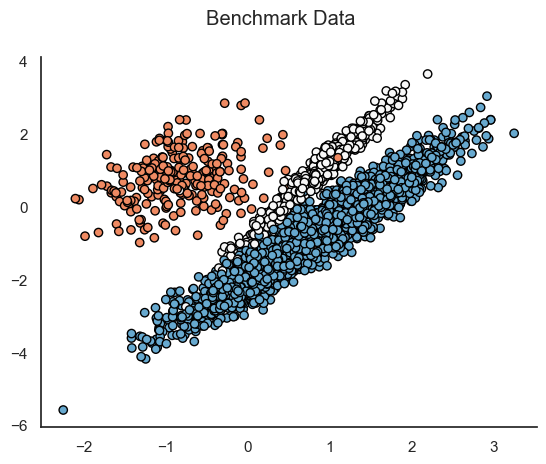

Counter({2: 3980, 1: 758, 0: 262})

In [82]:
import seaborn as sns
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.05, 0.15, 0.80],
                           class_sep=0.8, random_state=0)


colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data")
plt.show()
Counter(y)

## Oversampling

### SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE generates synthetic samples for the minority class by selecting two or more similar instances and generating new instances that lie between these instances in the feature space.

#### When to Use
- Use SMOTE when you have a continuous dataset without categorical features. It works well when your features are numerical and you want a straightforward method to balance your dataset.

by use sampling_strategy is 100%

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 758, 0: 262})
Applying SMOTE with strategy {0: 3980, 1: 3980}
Final class distribution: Counter({1: 3980, 2: 3980, 0: 3980})
Over-sampling and/or under-sampling process completed.


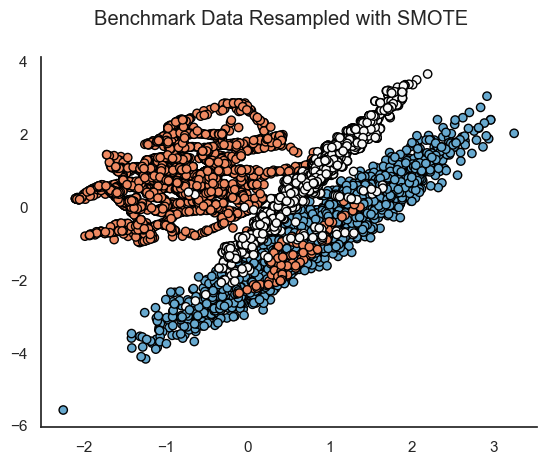

Counter({1: 3980, 2: 3980, 0: 3980})

In [84]:
X_resampled, y_resampled = over_under_sampling_classification(X,y,over_sampling='SMOTE',over_sampling_strategy={0: 3980, 1: 3980},under=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_resampled)

by use sampling_strategy as you wish

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 758, 0: 262})
Applying SMOTE with strategy {0: 2000, 1: 2000}
Final class distribution: Counter({2: 3980, 1: 2000, 0: 2000})
Over-sampling and/or under-sampling process completed.


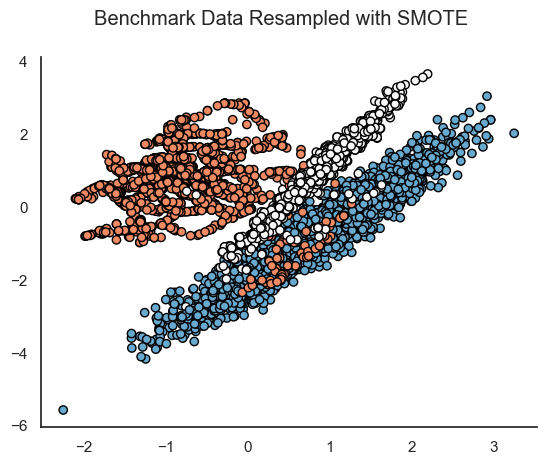

Counter({2: 3980, 1: 2000, 0: 2000})

In [85]:
X_resampled, y_resampled = over_under_sampling_classification(X,y,over_sampling='SMOTE',over_sampling_strategy={0: 2000, 1: 2000},under=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_resampled)

### SVMSMOTE (SVM-SMOTE)
SVMSMOTE is a variation of SMOTE that uses Support Vector Machines (SVM) to generate synthetic samples. It focuses on generating samples near the decision boundary defined by the SVM.

#### When to Use
- Use SVMSMOTE when you want to generate synthetic samples near the decision boundary. It’s useful for datasets where the boundary between classes is complex, and traditional SMOTE might not perform well.

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 758, 0: 262})
Applying SVMSMOTE with strategy {0: 2000, 1: 2000}
Final class distribution: Counter({2: 3980, 1: 2000, 0: 2000})
Over-sampling and/or under-sampling process completed.


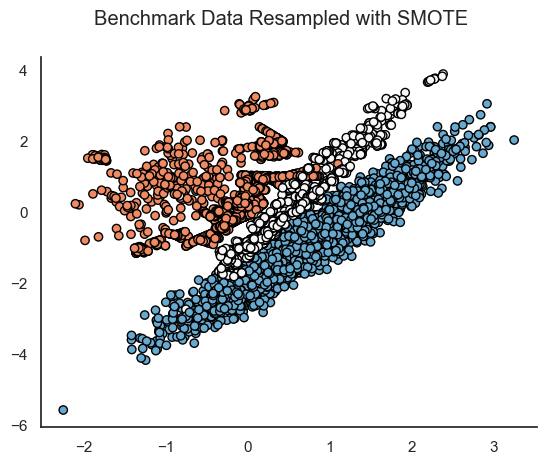

Counter({2: 3980, 1: 2000, 0: 2000})

In [102]:
X_resampled, y_resampled = over_under_sampling_classification(X,y,over_sampling='SVMSMOTE',over_sampling_strategy={0: 2000, 1: 2000},under=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_resampled)

### BorderlineSMOTE(kind='borderline-1')
BorderlineSMOTE focuses on generating synthetic samples near the borderlines of the minority class. In kind='borderline-1', it generates synthetic samples only for minority class instances that are near the borderline.

#### When to Use
- Use BorderlineSMOTE(kind='borderline-1') when you want to focus on balancing the dataset by generating samples specifically near the decision boundary to help the classifier better learn the separation between classes.

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 758, 0: 262})
Applying BorderlineSMOTE(kind="borderline-1") with strategy {0: 2000, 1: 2000}
Final class distribution: Counter({2: 3980, 1: 2000, 0: 2000})
Over-sampling and/or under-sampling process completed.


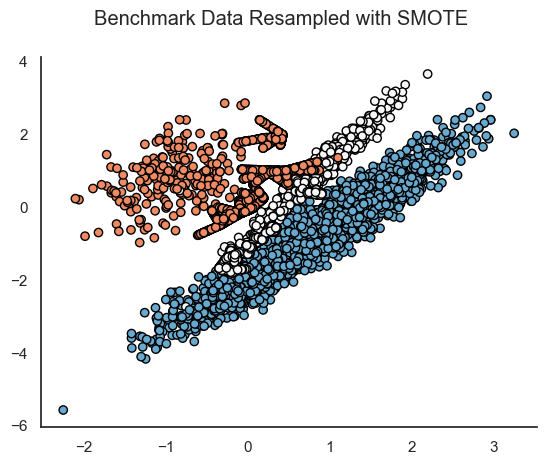

Counter({2: 3980, 1: 2000, 0: 2000})

In [87]:
X_resampled, y_resampled = over_under_sampling_classification(X,y,over_sampling='BorderlineSMOTE-1',over_sampling_strategy={0: 2000, 1: 2000},under=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_resampled)

### BorderlineSMOTE(kind='borderline-2')
Similar to kind='borderline-1', but in kind='borderline-2', synthetic samples are generated both for minority class instances and their nearest neighbors, regardless of the class.

#### When to Use
- Use BorderlineSMOTE(kind='borderline-2') when you want to enhance the learning of the classifier by generating samples near the decision boundary, including from both minority and majority classes.

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 758, 0: 262})
Applying BorderlineSMOTE(kind="borderline-2") with strategy {0: 2000, 1: 2000}
Final class distribution: Counter({2: 3980, 1: 2000, 0: 2000})
Over-sampling and/or under-sampling process completed.


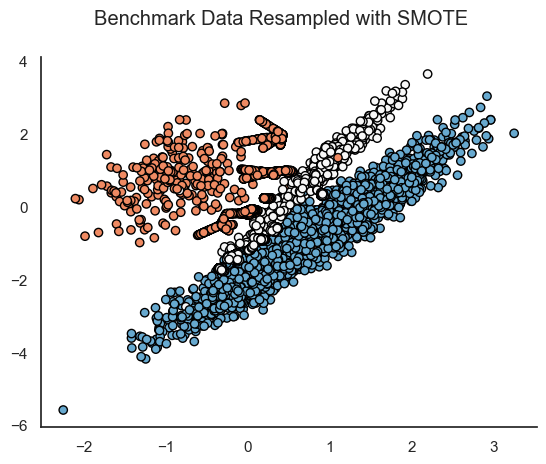

Counter({2: 3980, 1: 2000, 0: 2000})

In [88]:
X_resampled, y_resampled = over_under_sampling_classification(X,y,over_sampling='BorderlineSMOTE-2',over_sampling_strategy={0: 2000, 1: 2000},under=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_resampled)

### ADASYN (Adaptive Synthetic Sampling)
ADASYN is an adaptive version of SMOTE. It generates synthetic samples based on the density of the minority class instances. It focuses more on generating samples for minority class instances that are harder to learn (i.e., near the boundary).

#### When to use
- Use ADASYN when you want to generate synthetic samples adaptively based on the learning difficulty. It is particularly useful when the class distribution is complex and you want to prioritize more difficult instances.

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 758, 0: 262})
Applying ADASYN with strategy {0: 2000, 1: 2000}
Final class distribution: Counter({2: 3980, 0: 1990, 1: 1987})
Over-sampling and/or under-sampling process completed.


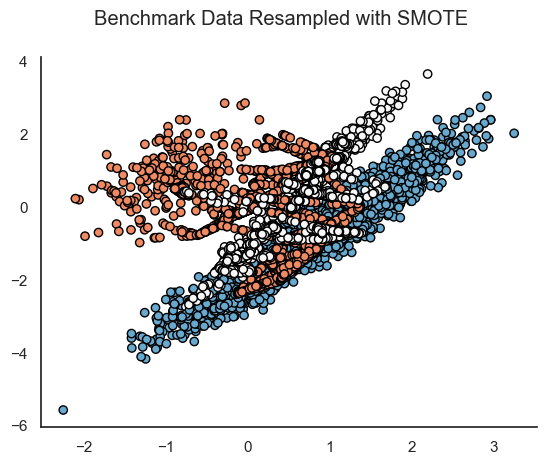

Counter({2: 3980, 0: 1990, 1: 1987})

In [89]:
X_resampled, y_resampled = over_under_sampling_classification(X,y,over_sampling='ADASYN',over_sampling_strategy={0: 2000, 1: 2000},under=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_resampled)

### SMOTEN (SMOTE for Nominal)
SMOTEN is specifically designed for datasets with only categorical features. It generates synthetic samples by considering the categorical nature of the data.

#### When to Use
Use SMOTEN when your dataset contains only categorical features. It ensures that synthetic samples are generated in a way that respects the categorical nature of the data.

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 758, 0: 262})
Applying SMOTEN with strategy {0: 2000, 1: 2000}
Final class distribution: Counter({2: 3980, 1: 2000, 0: 2000})
Over-sampling and/or under-sampling process completed.


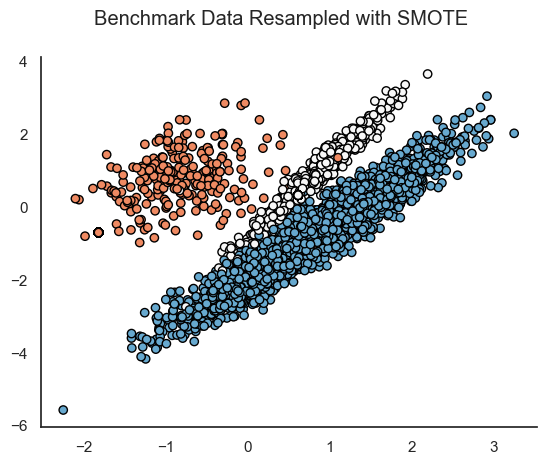

Counter({2: 3980, 1: 2000, 0: 2000})

In [90]:
X_resampled, y_resampled = over_under_sampling_classification(X,y,over_sampling='SMOTEN',over_sampling_strategy={0: 2000, 1: 2000},under=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_resampled)

### SMOTENC (SMOTE for Nominal and Continuous)
SMOTENC is an extension of SMOTE that can handle both continuous and categorical features. It generates synthetic samples by considering the nature of the features, ensuring categorical features remain categorical.

#### When to Use
- Use SMOTENC when your dataset contains both numerical and categorical features. It helps in maintaining the integrity of categorical features while generating synthetic samples.

In [ ]:
# X_resampled, y_resampled = over_under_sampling_classification(X,y,over_sampling='SMOTENC',over_sampling_strategy={0: 2000, 1: 2000},under=False)

# # Plot the resampled data
# kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
# colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
# plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
# sns.despine()
# plt.suptitle("Benchmark Data Resampled with SMOTE")
# plt.show()
# Counter(y_resampled)

### Summary Table

| Technique                              | Continuous Features | Categorical Features | Focus                                |
|----------------------------------------|---------------------|----------------------|--------------------------------------|
| SMOTE                                  | Yes                 | No                   | General over-sampling                |
| SVMSMOTE                               | Yes                 | No                   | Near decision boundary               |
| BorderlineSMOTE (kind='borderline-1')  | Yes                 | No                   | Near borderline minority samples     |
| BorderlineSMOTE (kind='borderline-2')  | Yes                 | No                   | Near borderline all samples          |
| ADASYN                                 | Yes                 | No                   | Adaptive, near difficult samples     |
| SMOTEN                                 | No                  | Yes                  | Categorical features only            |
| SMOTENC                                | Yes                 | Yes                  | Mixed feature types                  |


### Random_oversampling
Randomly replicating minority class examples until the dataset is balanced.

#### When to use 
- When you have a small imbalance and the data is not prone to overfitting.

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 758, 0: 262})
Applying RandomOverSampler with strategy {0: 2000, 1: 2000}
Final class distribution: Counter({2: 3980, 1: 2000, 0: 2000})
Over-sampling and/or under-sampling process completed.


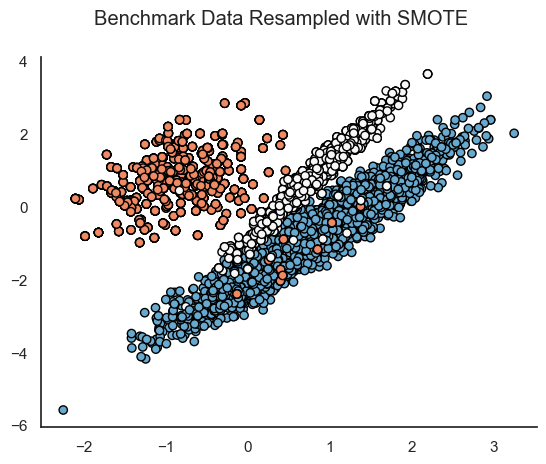

Counter({2: 3980, 1: 2000, 0: 2000})

In [96]:
X_resampled, y_resampled = over_under_sampling_classification(X,y,over_sampling='random_over_sampler',over_sampling_strategy={0: 2000, 1: 2000},under=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_resampled)

## Undersampling

### TomekLinks
Tomek Links are pairs of instances from different classes that are each other’s nearest neighbors. Removing these pairs can help clean the border between classes.

#### Use Case
- When you want to clean the dataset and make the decision boundary clearer by removing ambiguous points near the class boundary.

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 2000, 0: 2000})
Applying TomekLinks under-sampling.
Final class distribution: Counter({2: 3960, 0: 2000, 1: 1981})
Over-sampling and/or under-sampling process completed.


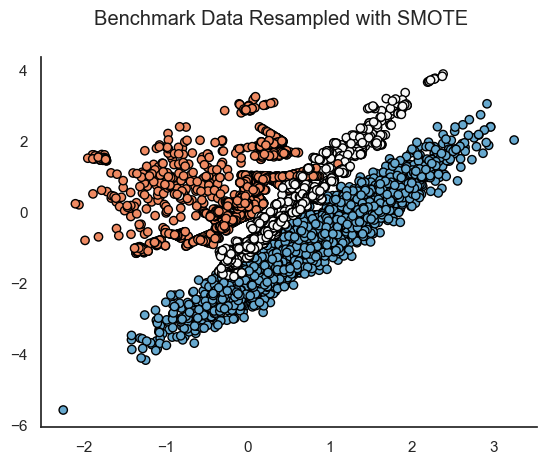

Counter({2: 3960, 0: 2000, 1: 1981})

In [103]:
X_undersampling, y_undersampling = over_under_sampling_classification(X_resampled,y_resampled,under_sampling='TomekLinks',over=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_undersampling]
plt.scatter(X_undersampling[:, 0], X_undersampling[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_undersampling)

### EditedNearestNeighbours (ENN)
This technique removes instances from the majority class if they differ from their nearest neighbors. Specifically, it checks the class of the k-nearest neighbors of each instance and removes it if its class label differs from the majority of its neighbors.

#### Use Case
- When you want to smooth out class boundaries by removing misclassified majority class instances.

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 2000, 0: 2000})
Applying EditedNearestNeighbours with strategy auto
Final class distribution: Counter({2: 3856, 0: 2000, 1: 1899})
Over-sampling and/or under-sampling process completed.


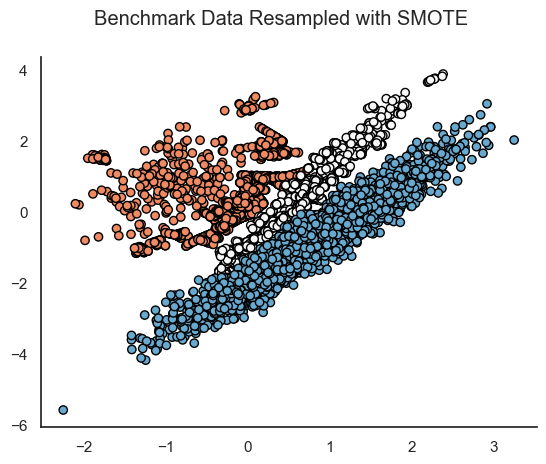

Counter({2: 3856, 0: 2000, 1: 1899})

In [108]:
X_undersampling, y_undersampling = over_under_sampling_classification(X_resampled,y_resampled,under_sampling='EditedNearestNeighbours',over=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_undersampling]
plt.scatter(X_undersampling[:, 0], X_undersampling[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_undersampling)

### RepeatedEditedNearestNeighbours (RENN)
RENN is an extension of ENN where the ENN process is repeated multiple times until no more instances can be removed.

#### Use Case
- When ENN alone does not suffice, and you need a more aggressive cleaning of the majority class instances.

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 2000, 0: 2000})
Applying RepeatedEditedNearestNeighbours with strategy auto
Final class distribution: Counter({2: 3844, 0: 1980, 1: 1899})
Over-sampling and/or under-sampling process completed.


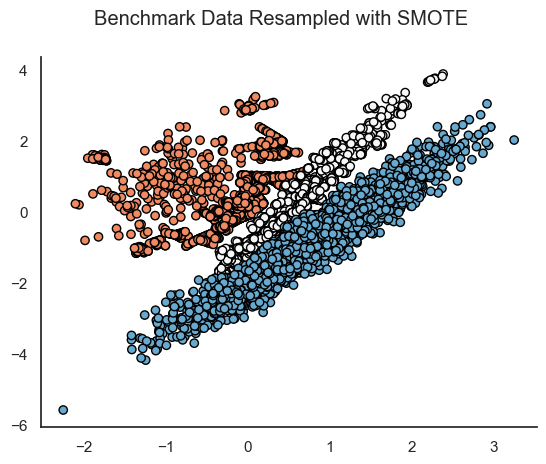

Counter({2: 3844, 0: 1980, 1: 1899})

In [109]:
X_undersampling, y_undersampling = over_under_sampling_classification(X_resampled,y_resampled,under_sampling='RepeatedEditedNearestNeighbours',over=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_undersampling]
plt.scatter(X_undersampling[:, 0], X_undersampling[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_undersampling)

### All KNN (AIIKNN)
Similar to ENN, but it removes instances based on the majority vote of their k-nearest neighbors for multiple values of k.
#### Use Case
- When you want a more thorough and robust version of ENN, considering multiple neighbor configurations.

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 2000, 0: 2000})
Applying AllKNN with strategy auto
Final class distribution: Counter({2: 3883, 0: 1972, 1: 1962})
Over-sampling and/or under-sampling process completed.


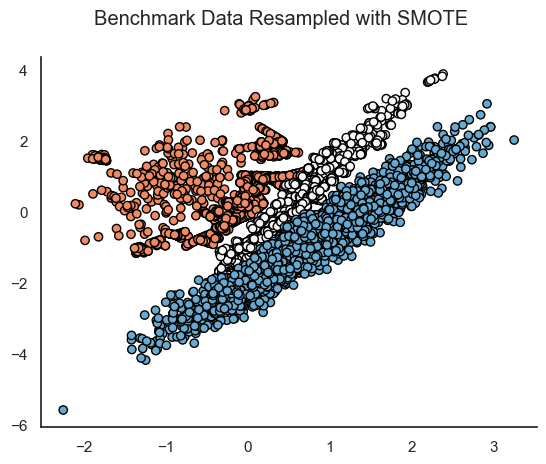

Counter({2: 3883, 0: 1972, 1: 1962})

In [110]:
X_undersampling, y_undersampling = over_under_sampling_classification(X_resampled,y_resampled,under_sampling='AllKNN',over=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_undersampling]
plt.scatter(X_undersampling[:, 0], X_undersampling[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_undersampling)

### CondensedNearestNeighbour (CNN)
CNN aims to retain a subset of the training data that ensures the nearest neighbor rule will yield the same results as the full dataset. It starts with the minority class and iteratively adds majority class instances that are misclassified by the current subset.
#### Use Case
- When you need to reduce the dataset size while retaining a representative sample that maintains the same classification performance.

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 2000, 0: 2000})
Applying CondensedNearestNeighbour with strategy auto
Final class distribution: Counter({0: 2000, 2: 179, 1: 1})
Over-sampling and/or under-sampling process completed.


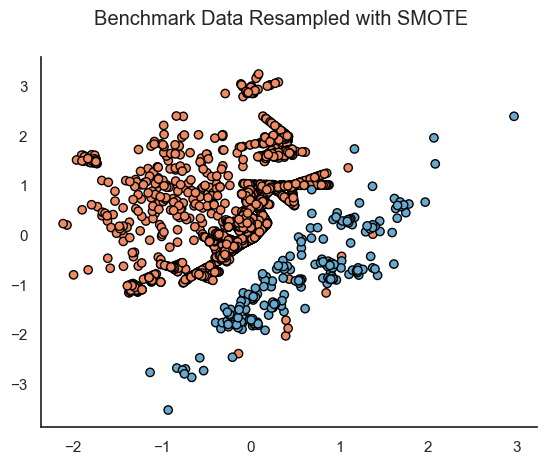

Counter({0: 2000, 2: 179, 1: 1})

In [111]:
X_undersampling, y_undersampling = over_under_sampling_classification(X_resampled,y_resampled,under_sampling='CondensedNearestNeighbour',over=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_undersampling]
plt.scatter(X_undersampling[:, 0], X_undersampling[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_undersampling)

### Cluster Centroids
This technique uses clustering (e.g., K-Means) to generate synthetic instances that represent the centroids of clusters formed by the majority class.

#### Use Case
- When you want to reduce the majority class size by summarizing it through representative points.

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 2000, 0: 2000})
Applying ClusterCentroids with strategy auto


c:\Users\PC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\PC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Final class distribution: Counter({0: 2000, 1: 2000, 2: 2000})
Over-sampling and/or under-sampling process completed.


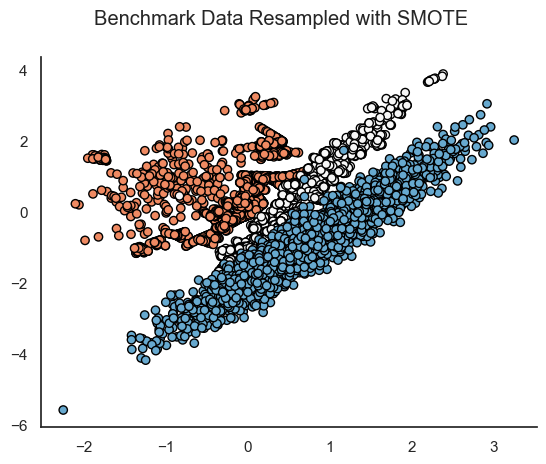

Counter({0: 2000, 1: 2000, 2: 2000})

In [112]:
X_undersampling, y_undersampling = over_under_sampling_classification(X_resampled,y_resampled,under_sampling='ClusterCentroids',over=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_undersampling]
plt.scatter(X_undersampling[:, 0], X_undersampling[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_undersampling)

### NearMiss
NearMiss is a family of undersampling methods that selects majority class instances based on their distance to minority class instances. Different versions (NearMiss-1, NearMiss-2, etc.) define "closeness" in various ways.

#### Use Case
- When you want to ensure that the remaining majority class instances are those closest to the minority class, which can help with learning a more precise decision boundary.

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 2000, 0: 2000})
Applying NearMiss(version=1) with strategy auto
Final class distribution: Counter({0: 2000, 1: 2000, 2: 2000})
Over-sampling and/or under-sampling process completed.


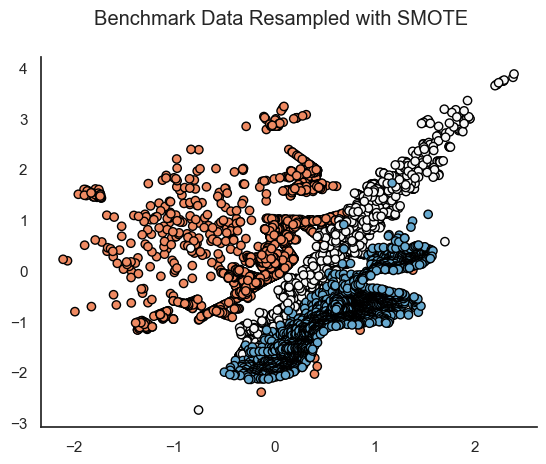

Counter({0: 2000, 1: 2000, 2: 2000})

In [113]:
X_undersampling, y_undersampling = over_under_sampling_classification(X_resampled,y_resampled,under_sampling='NearMiss',over=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_undersampling]
plt.scatter(X_undersampling[:, 0], X_undersampling[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_undersampling)

### Random_undersampling
Randomly removes instances from the majority class to achieve a more balanced dataset.
#### Use Case
- When you need a simple and quick method to balance the dataset, keeping in mind that it might remove potentially informative instances.

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({2: 3980, 1: 2000, 0: 2000})
Applying RandomUnderSampler with strategy auto
Final class distribution: Counter({0: 2000, 1: 2000, 2: 2000})
Over-sampling and/or under-sampling process completed.


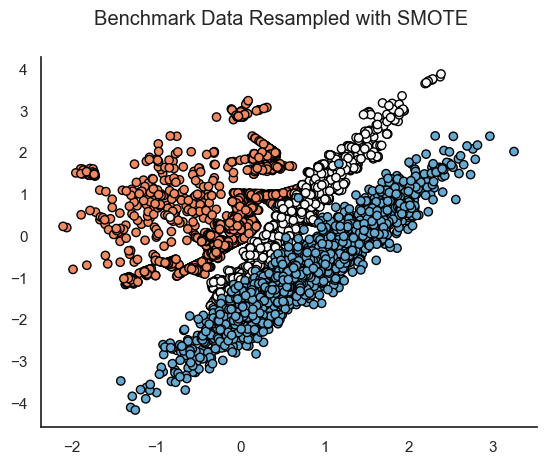

Counter({0: 2000, 1: 2000, 2: 2000})

In [114]:
X_undersampling, y_undersampling = over_under_sampling_classification(X_resampled,y_resampled,under_sampling='random_under_sampler',over=False)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_undersampling]
plt.scatter(X_undersampling[:, 0], X_undersampling[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_undersampling)

### Summary
- Use TomekLinks and ENN to clean and refine the dataset, especially near decision boundaries.
- Use RENN and All KNN for more aggressive cleaning.
- Use CNN to retain a smaller, representative subset of the data.
- Use Cluster Centroids to summarize and reduce the majority class size.
- Use NearMiss to keep majority class instances close to the minority class.
- Use Random Undersampling for a quick and simple approach to balance the dataset.

### *------------------------------------------------------------------------------------------------------------------*

# Feature Selection

## Read data

In [4]:
data = read_data('Edit_Breast_Cancer.csv')
df = copy.deepcopy(data)
df.head()

the DataFrame dont have any duplicates row
Data read successfully from Edit_Breast_Cancer.csv


Unnamed: 0  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           0        17.99         10.38          122.80     1001.0   
1           1        20.57         17.77          132.90     1326.0   
2           2        19.69         21.25          130.00     1203.0   
3           3        11.42         20.38           77.58      386.1   
4           4        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0          0.4601                  0.11890          1  
1          0.2750                  0.08902          1  
2          0.3613                  0.08758          1  
3          0.6638                  0.17300          1  
4          0.2364                  0.07678          1  

[5 rows x 32 columns]

In [5]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
x_train, x_test = scale_data(x_train=x_train, x_test=x_test,scaler_type='minmax')

## 1. Filter Methods

## Select Methods
Methods is used to select the most relevant features from a dataset based on statistical tests.

### 1. SelectKBest
Selects the top 𝑘 features based on a specified statistical test score.

#### When to use: 
- Use this method when you want to retain a fixed number of top features regardless of the threshold.

In [43]:
x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SelectKBest', stat_method='f_classif', k=25)

In [44]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 11375
size of x_test  = 3534
size of new x_test  = 2850


### 2. SelectFpr
Selects features based on the false positive rate (FPR). It uses a specified threshold to select features with a p-value lower than the threshold.

#### When to use: 
- Use this method when you want to control the selection process based on the false positive rate.

In [45]:
x_train_new, x_test_new, _ = feature_selection(x_train=x_train,y_train=y_train,x_test=x_test,method='SelectFpr',stat_method='chi2', alpha=0.1)

In [46]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 10920
size of x_test  = 3534
size of new x_test  = 2736


### 3. SelectFdr
Selects features based on the false discovery rate (FDR). It controls the expected proportion of incorrectly rejected null hypotheses (false discoveries).

#### When to use:
- Use this method when you want to control the rate of false discoveries, especially useful in scenarios with multiple comparisons.

In [47]:
x_train_new, x_test_new, _ = feature_selection(x_train=x_train,y_train=y_train,x_test=x_test,method='SelectFdr',stat_method='f_classif', alpha=0.1)

In [48]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 11830
size of x_test  = 3534
size of new x_test  = 2964


### 4. SelectFwe
Selects features based on the family-wise error rate (FWE). It controls the probability of making at least one type I error among all the tests.

#### When to use:
- Use this method when you want to be very stringent about not making any type I errors.

In [49]:
x_train_new, x_test_new, _ = feature_selection(x_train=x_train,y_train=y_train,x_test=x_test,method='SelectFwe',stat_method='f_classif', alpha=0.1)

In [50]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 11830
size of x_test  = 3534
size of new x_test  = 2964


### 5. SelectPercentile
Selects features based on the percentile of the highest scores. You specify a percentile instead of an absolute number.

#### When to use: 
- Use this method when you want to retain a certain percentage of the top features rather than a fixed number.

In [58]:
x_train_new, x_test_new, _ = feature_selection(x_train=x_train,y_train=y_train,x_test=x_test,method='SelectPercentile',stat_method='f_classif', percentile=70)

In [59]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 9555
size of x_test  = 3534
size of new x_test  = 2394


### 6. GenericUnivariateSelect
Provides a configurable strategy for univariate feature selection. You can choose the mode (percentile, k-best, FPR, FDR, or FWE) and customize it.

#### When to use: 
- Use this method when you need more flexibility and want to dynamically select features based on different strategies.

In [69]:
x_train_new, x_test_new, _ = feature_selection(x_train=x_train,y_train=y_train,x_test=x_test,method='GenericUnivariateSelect',stat_method='f_classif', percentile=70)

In [70]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 9555
size of x_test  = 3534
size of new x_test  = 2394


### Summary
- SelectKBest: Fixed number of top features.
- SelectFpr: Features below a p-value threshold based on FPR.
- SelectFdr: Controls false discovery rate.
- SelectFwe: Controls family-wise error rate.
- SelectPercentile: Percentage of top features.
- GenericUnivariateSelect: Flexible, configurable strategy.

## statistical Methods

### 1. Pearson Correlation Coefficient
Pearson correlation measures the linear correlation between two variables, producing a value between -1 and 1. A value closer to 1 or -1 indicates a strong correlation.

#### Advantages:
- Simple to implement and understand. (Simple to compute)
- Provides insights into the linear relationships between features. (Effective for linear relationships)

#### Disadvantages:
- Only detects linear relationships.
- Can be misleading if the data contains outliers. (Sensitive to outliers)

#### When to Use:
- When you expect a linear relationship between features and the target variable.
- When the dataset is relatively clean and free of outliers.

In [71]:
x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SelectKBest', stat_method='f_regression', k=22)

In [72]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 10010
size of x_test  = 3534
size of new x_test  = 2508


### 2. Chi-Square Test
The chi-square test measures the dependence between two categorical variables. It is used to assess whether a feature is independent of the target variable, often used for categorical data.

#### Advantages:
- Effective for categorical data.
- Non-parametric, does not assume a normal distribution.
- Identifies non-linear relationships.

#### Disadvantages:
- Only works with categorical features.
- Requires large sample sizes for reliable results.
- Not suitable for continuous variables.

#### When to Use:
- When features and target variable are categorical.
- When you have a large enough dataset to provide reliable chi-square statistics.

#### note:
- don't work when use StanderScaler() before it because the feature has negative number.

In [73]:
x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SelectKBest', stat_method='chi2', k=22)

In [74]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 10010
size of x_test  = 3534
size of new x_test  = 2508


### 3. ANOVA F-Test
ANOVA F-test measures the linear dependency between features and the target variable by comparing the variances within and between groups.

#### Advantages:
- Simple and fast.
- Effective for numerical data.
- Suitable for continuous data.
- Can handle multiple features at once.

#### Disadvantages:
- Assumes normal distribution.
- Only detects linear relationships.

#### When to Use:
- When features and target are numerical and normally distributed.
- When the assumptions of normality are met.

In [75]:
x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SelectKBest', stat_method='f_classif', k=22)

In [76]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 10010
size of x_test  = 3534
size of new x_test  = 2508


### 4. Mutual Information
Mutual Information measures the mutual dependence between variables, capturing both linear and non-linear relationships.

#### Advantages:
- Captures both linear and non-linear relationships.
- Suitable for both numerical and categorical data.

#### Disadvantages:
- Computationally intensive for large datasets.
- Requires discretization for continuous variables.
- Results can be less interpretable compared to simpler methods.

#### When to Use:
- When you need to capture non-linear relationships between features.
- When dealing with a mix of categorical and continuous data.

In [77]:
x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SelectKBest', stat_method='mutual_info_classif', k=22)

In [78]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 10010
size of x_test  = 3534
size of new x_test  = 2508


In [ ]:
x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SelectKBest', stat_method='mutual_info_regression', k=22)

In [ ]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

### 5. Variance Threshold
Variance Threshold removes all features whose variance does not meet some threshold. Features with low variance are less likely to be useful for distinguishing between classes.

### Advantages:
- Simple and fast to compute. (Simple to implement)
- Removes redundant features.
- Effective in removing constant or near-constant features.

### Disadvantages:
- May remove features that are important but have low variance.
- Does not consider the relationship between features and the target variable.

### When to Use:
- As a preprocessing step to remove low-variance features.
- As a preliminary step to remove features with very low variance.
- When dealing with high-dimensional data where some features are constant.

In [87]:
x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='VarianceThreshold', threshold=0)

In [88]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 14105
size of x_test  = 3534
size of new x_test  = 3534


## 2. Wrapper Methods

### 1. Recursive Feature Elimination (RFE)
RFE works by recursively removing the least important features and building the model with the remaining features. The importance of a feature is determined based on the model's performance.

#### Advantages:
- Considers feature interactions.
- Effective for small to medium-sized datasets.
- Provides a ranking of features.

#### Disadvantages:
- Computationally expensive.
- Prone to overfitting on small datasets.

#### When to Use:
- When you have a small to medium-sized dataset and want to consider feature interactions.
- When you have sufficient computational resources.
- When feature interactions are important to capture.

In [96]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='RFE', n_features_to_select=22)
# x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='RFE', estimator= LinearSVC(), n_features_to_select=22)
# x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='RFE', estimator= LogisticRegression(), n_features_to_select=22)

In [97]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 10010
size of x_test  = 3534
size of new x_test  = 2508


### 2. Recursive Feature Elimination with Cross-Validation (RFECV)
RFECV is an extension of Recursive Feature Elimination (RFE) that uses cross-validation to determine the optimal number of features. It recursively removes the least important features and uses cross-validation to evaluate the model performance at each step.

#### Advantages:
- Automatically selects the optimal number of features.
- Reduces the risk of overfitting by using cross-validation.
- Considers feature interactions.

#### Disadvantages:
- More computationally intensive than RFE due to cross-validation.
- Can still be slow for very large datasets.
- Prone to overfitting on small datasets.

#### When to Use:
- When you want to determine the optimal number of features automatically and consider feature interactions.
- When you have sufficient computational resources.
- When you want to automatically determine the optimal number of features.
- When cross-validation is necessary to prevent overfitting.

In [101]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

skf = StratifiedKFold(5)

x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='RFECV', cv=skf)
# x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='RFECV',estimator= LinearSVC(), cv=skf)
# x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='RFE', estimator= LogisticRegression(), n_features_to_select=22)

In [102]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 8190
size of x_test  = 3534
size of new x_test  = 2052


### 3. Sequential Feature Selection (SFS)
Sequential Feature Selection (SFS) is a greedy search algorithm that adds or removes features sequentially based on the model's performance. There are two types: forward selection and backward elimination.

#### Advantages:
- Simple and intuitive.
- Can be used with any model.
- Can handle feature interactions.

#### Disadvantages:
- Computationally expensive.
- Prone to local optima.
- May overfit if the dataset is small.

#### When to Use:
- When you need a simple and intuitive method to select features considering interactions.
- When you have sufficient computational resources.
- When feature interactions are important to capture.

In [103]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

skf = StratifiedKFold(5)

x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SequentialFeatureSelector', direction='forward', cv=skf, n_features_to_select=22)
# x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SequentialFeatureSelector', estimator=LinearSVC(), direction='forward', cv=skf, n_features_to_select=22)
# x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SequentialFeatureSelector', estimator=LogisticRegression(), direction='forward', cv=skf, n_features_to_select=22)

In [104]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 10010
size of x_test  = 3534
size of new x_test  = 2508


In [105]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

skf = StratifiedKFold(5)

x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SequentialFeatureSelector', direction='backward', cv=skf, n_features_to_select=22)
# x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SequentialFeatureSelector', estimator=LinearSVC(), direction='backward', cv=skf, n_features_to_select=22)
# x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SequentialFeatureSelector', estimator=LogisticRegression(), direction='backward', cv=skf, n_features_to_select=22)

In [106]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 10010
size of x_test  = 3534
size of new x_test  = 2508


### 4. Exhaustive Feature Selection
Exhaustive feature selection evaluates all possible combinations of features to find the best subset based on model performance.

#### Advantages:
- Guarantees the optimal feature subset.

#### Disadvantages:
- Extremely computationally intensive.
- Not feasible for large feature sets.

#### When to Use:
- When the feature set is small.
- When you need the optimal feature subset.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

skf = StratifiedKFold(5)

x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='ExhaustiveFeatureSelector', n_features_to_select=22, cv=skf, scoring='accuracy')
# x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='ExhaustiveFeatureSelector',estimator=LinearSVC(), n_features_to_select=22, cv=skf, scoring='accuracy')
# x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='ExhaustiveFeatureSelector',estimator=LogisticRegression(), n_features_to_select=22, cv=skf, scoring='accuracy')

In [ ]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

### 5. SelectFromModel
SelectFromModel is a meta-transformer that selects features based on the importance weights from an estimator (e.g., coefficients in linear models, feature importances in tree-based models).

#### Advantages:
- Flexible and can be used with any model that provides feature importance.
- Considers feature importance as determined by the model.

#### Disadvantages:
- Performance depends on the quality of the underlying model.
- May not work well if the model's feature importance scores are not reliable.
- Requires an estimator that provides feature importance.
- May require tuning of the threshold parameter to select the appropriate number of features.

#### When to Use:
- When you have a model that provides reliable feature importance scores and you want to use them for feature selection.
- When you want a flexible feature selection method that can work with various types of models.

In [110]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SelectFromModel',estimator= RandomForestClassifier(n_estimators=100))
# x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SelectFromModel')
# x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SelectFromModel',estimator=LinearSVC())
# x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SelectFromModel',estimator=LogisticRegression())

In [111]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 4550
size of x_test  = 3534
size of new x_test  = 1140


### 6. Genetic Algorithm (GA)
Genetic Algorithms (GA) are inspired by the process of natural selection. They use operations like selection, crossover, and mutation to evolve a population of feature subsets towards optimal solutions.

#### Advantages:
- Can escape local optima.
- Can handle large search spaces.
- Capable of capturing complex feature interactions.

#### Disadvantages:
- Computationally expensive.
- Highly computationally intensive.
- Requires careful tuning of parameters.

#### When to Use:
- When you have very large feature sets and sufficient computational resources.
- When dealing with large search spaces and complex feature interactions.
- When traditional methods fail to find good feature subsets.

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(2)

x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='TPOTClassifier', task='classification', generations=5, population_size=50, cv=3, verbosity=2)

In [ ]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(5)

x_train_new, x_test_new, _ = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='TPOTRegressor', task='regression', generations=5, population_size=50, cv=skf, verbosity=2)

In [ ]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.datasets import make_classification
# import numpy as np
# import random

# # Example data
# X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# def fitness_function(individual):
#     selected_features = [i for i in range(len(individual)) if individual[i] == 1]
#     if len(selected_features) == 0:
#         return 0
#     score = cross_val_score(LogisticRegression(), X[:, selected_features], y, cv=5).mean()
#     return score

# def genetic_algorithm(population, generations, mutation_rate):
#     for generation in range(generations):
#         scores = [fitness_function(individual) for individual in population]
#         best_individual = population[np.argmax(scores)]
#         new_population = [best_individual]
#         for _ in range(len(population) - 1):
#             parent1, parent2 = random.choices(population, weights=scores, k=2)
#             crossover_point = random.randint(1, len(parent1) - 1)
#             child = parent1[:crossover_point] + parent2[crossover_point:]
#             child = [gene if random.random() > mutation_rate else 1 - gene for gene in child]
#             new_population.append(child)
#         population = new_population
#     return best_individual

# # Initial population (binary representation of feature subsets)
# initial_population = [[random.randint(0, 1) for _ in range(X.shape[1])] for _ in range(20)]
# best_individual = genetic_algorithm(initial_population, generations=50, mutation_rate=0.01)

# selected_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
# print("Selected Features:", selected_features)


## 3. Embedded Methods

### 1. Lasso Regression (L1 Regularization)
Lasso (Least Absolute Shrinkage and Selection Operator) is a linear model that includes an L1 regularization term. This regularization term constrains the coefficients of the model, potentially forcing some of them to be exactly zero, thereby performing feature selection.

#### Advantages:
- Can reduce the number of features by driving some coefficients to zero.
- Helps to prevent overfitting.
- Can improve model interpretability.

#### Disadvantages:
- Can be computationally expensive.
- Can be unstable when features are highly correlated.
- Tends to select only one feature from a group of correlated features.
- Only works with linear models.

#### When to Use:
- When you have a linear model and need to reduce the number of features.
- When you have a large number of features and want to perform feature selection.

#### ----------------------------------------------------------------------------------------------------------------------------------

### 2. Ridge Regression (L2 Regularization)
Ridge Regression is similar to LASSO but uses L2 regularization. While it doesn't perform feature selection by zeroing coefficients, it can still be used to reduce the impact of less important features.

#### Advantages:
- Helps to prevent overfitting.
- Handles multicollinearity better.
- All features remain in the model.
- Works well when you have many features.

#### Disadvantages:
- Does not perform feature selection (all coefficients are shrunk but none are driven to zero).

#### When to Use:
- When you have a linear model with many features and want to prevent overfitting.
- When you have multicollinearity in your features and don't need explicit feature selection.

#### ----------------------------------------------------------------------------------------------------------------------------------

### 3. Elastic Net
Elastic Net combines both L1 and L2 regularization terms. This technique can balance between the feature selection properties of LASSO and the stability of Ridge Regression.

#### Advantages:
- Can select features and prevent overfitting.
- Can handle correlated features better.
- Balances the strengths of Lasso and Ridge.

#### Disadvantages:
- Can be computationally expensive.
- More complex to tune due to two regularization parameters.

#### When to Use:
- When you need both feature selection and regularization in a linear model.
- When you want a balance between feature selection and handling multicollinearity.

#### ----------------------------------------------------------------------------------------------------------------------------------

### 4. Decision Trees
Decision Trees can be used for feature selection by evaluating the importance of each feature in splitting the data at various points.

#### Advantages:
- Simple to interpret.
- Can capture non-linear relationships.

#### Disadvantages:
- Prone to overfitting.
- Can be unstable with small data changes.

#### When to Use:
- When interpretability is important and the relationship between features and target is non-linear.

#### ----------------------------------------------------------------------------------------------------------------------------------

### 5. Random Forest
Random Forest is an ensemble method of decision trees that can provide a measure of feature importance by averaging the importance measures of each tree.

#### Advantages:
- Reduces overfitting compared to individual decision trees.
- Provides feature importance measures.

#### Disadvantages:
- Can be computationally intensive.

#### When to Use:
- When you need robust feature importance measures and have enough computational resources.

#### ----------------------------------------------------------------------------------------------------------------------------------

### 6. Gradient Boosting Machines (GBM)
GBM builds an ensemble of decision trees in a sequential manner. It can provide feature importance based on the improvement of the loss function attributed to each feature.

#### Advantages:
- High accuracy.
- Can handle various data types.
- Provides feature importance measures.

#### Disadvantages:
- Can overfitting if not properly tuned.
- Computationally expensive.
- Requires careful parameter tuning.

#### When to Use:
- When high accuracy is needed and you want a robust feature importance ranking.

#### ----------------------------------------------------------------------------------------------------------------------------------

### 7. XGBoost (Extreme Gradient Boosting)
XGBoost is an implementation of gradient boosting that uses decision trees and an ensemble learning method to improve the performance of predictive models. It includes several enhancements like regularization, which helps in feature selection.

#### Advantages:
- High accuracy.
- Handles missing values.
- Built-in feature selection through regularization.
- Supports parallel processing.
- Robust to outliers and non-linear relationships.

#### Disadvantages:
- Can be complex to tune.
- Can overfitting if not properly regularized.
- Requires significant computational resources for large datasets.

#### When to Use:
- When you need a high-performing model and have sufficient computational resources.
- When dealing with complex datasets that might include non-linear relationships and interactions between features.

# Dimensionality reduction

## Read data

In [6]:
data = read_data('Edit_Breast_Cancer.csv')
df = copy.deepcopy(data)
df.head()

the DataFrame dont have any duplicates row
Data read successfully from Edit_Breast_Cancer.csv


Unnamed: 0  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           0        17.99         10.38          122.80     1001.0   
1           1        20.57         17.77          132.90     1326.0   
2           2        19.69         21.25          130.00     1203.0   
3           3        11.42         20.38           77.58      386.1   
4           4        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0          0.4601                  0.11890          1  
1          0.2750                  0.08902          1  
2          0.3613                  0.08758          1  
3          0.6638                  0.17300          1  
4          0.2364                  0.07678          1  

[5 rows x 32 columns]

In [7]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x_train.head()

Unnamed: 0  radius_mean  texture_mean  perimeter_mean  area_mean  \
68           68        9.029         17.33           58.79      250.5   
181         181       21.090         26.57          142.70     1311.0   
63           63        9.173         13.86           59.20      260.9   
248         248       10.650         25.22           68.01      347.0   
60           60       10.170         14.88           64.55      311.9   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
68           0.10660           0.14130         0.31300              0.04375   
181          0.11410           0.28320         0.24870              0.14960   
63           0.07721           0.08751         0.05988              0.02180   
248          0.09657           0.07234         0.02379              0.01615   
60           0.11340           0.08061         0.01084              0.01290   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
68          0.2111  ...         10.31          22.65            65.50   
181         0.2395  ...         26.68          33.48           176.50   
63          0.2341  ...         10.01          19.23            65.59   
248         0.1897  ...         12.25          35.19            77.98   
60          0.2743  ...         11.02          17.45            69.86   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
68        324.7           0.14820            0.43650          1.25200   
181      2089.0           0.14910            0.75840          0.67800   
63        310.1           0.09836            0.16780          0.13970   
248       455.7           0.14990            0.13980          0.11250   
60        368.6           0.12750            0.09866          0.02168   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
68                0.17500          0.4228                  0.11750  
181               0.29030          0.4098                  0.12840  
63                0.05087          0.3282                  0.08490  
248               0.06136          0.3409                  0.08147  
60                0.02579          0.3557                  0.08020  

[5 rows x 31 columns]

In [10]:
x_train, x_test = scale_data(x_train=x_train, x_test=x_test,scaler_type='minmax')

## 1. Linear Dimensionality Reduction

### 1. Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a statistical procedure that uses orthogonal transformation to convert a set of possibly correlated variables into a set of linearly uncorrelated variables called principal components.

#### Architecture
- Standardize the Data: Subtract the mean of each variable and divide by its standard deviation.
- Covariance Matrix Computation: Calculate the covariance matrix of the standardized data.
- Eigenvalue Decomposition: Compute the eigenvalues and eigenvectors of the covariance matrix.
- Sort Eigenvalues and Eigenvectors: Order eigenvalues in descending order and sort the corresponding eigenvectors.
- Projection: Project the data onto the eigenvectors corresponding to the largest eigenvalues.

#### Advantages
- Improves algorithm performance by reducing overfitting by reducing the number of features.
- Removes correlated features.
- Improves visualization.

#### Disadvantages
- Loses interpretability of the original features.
- Interpretability of principal components can be challenging.
- May lose important information.
- Sensitive to the scale of the data.

#### When to Use:
- When you have a large set of features.
- When you want to reduce the dimensionality of data for visualization.
- When you want to improve the performance of machine learning algorithms by removing multicollinearity.

In [9]:
x_train_new, x_test_new, _, PCA_model = dimensionality_reduction(x_train, x_test, method= 'PCA', n_components=23)
# Parameters
# n_components: Number of components to keep. If n_components is not set all components are kept.
# whiten: When True (default), the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.
# svd_solver: The solver to use ('auto', 'full', 'arpack', 'randomized').

In [14]:
print("Explained Variance Ratio:", PCA_model.explained_variance_ratio_)
# print("PCA Components:\n", PCA_model.components_)

Explained Variance Ratio: [0.4614352  0.16781464 0.10422563 0.06431539 0.05593725 0.03480865
 0.02948933 0.01403809 0.0118619  0.00897157 0.00868005 0.00753809
 0.00703019 0.00638936 0.00415416 0.00257905 0.00217753 0.00160545
 0.00132712 0.00127179 0.00095346 0.00082382 0.00069607]


In [15]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 10465
size of x_test  = 3534
size of new x_test  = 2622


### 2. Linear Discriminant Analysis (LDA)
Linear Discriminant Analysis (LDA) is a method used for dimensionality reduction that finds the linear combinations of features that best separate two or more classes of objects.

#### Architecture
- Compute the Mean Vectors: Calculate the mean vectors for each class.
- Compute the Scatter Matrices: Calculate the within-class and between-class scatter matrices.
- Compute Eigenvalues and Eigenvectors: Solve the generalized eigenvalue problem for the scatter matrices.
- Sort and Select Components: Sort the eigenvalues in descending order and select the top eigenvectors.
- Transform Data: Project the data onto the new feature space.

#### Advantages
- Enhances class separability.
- Takes class labels into account
- Useful in classification tasks.
- Reduces dimensionality while preserving as much class discriminatory information as possible.

#### Disadvantages
- Assumes normally distributed classes with identical covariance matrices.
- May not work well with non-linearly separable data.

#### When to Use:
- When you have labeled data.
- When performing classification tasks.
- When you want to reduce the dimensionality of the data while preserving class separability.

In [19]:
x_train_new, x_test_new, _, LDA_model = dimensionality_reduction(x_train, x_test, method= 'LDA', y_train=y_train, n_components=23)
# Parameters
# n_components: Number of components to keep.
# solver: The solver to use ('svd', 'lsqr', 'eigen').
# shrinkage: Shrinkage parameter (None, 'auto', float).

In [22]:
# print("LDA Components:\n", LDA_model.scalings_)

In [20]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 455
size of x_test  = 3534
size of new x_test  = 114


### 3. Factor Analysis (FA)
Factor Analysis (FA) is a technique used to identify underlying relationships between variables by modeling the observed variables as linear combinations of potential factors plus unique variances.

#### Architecture
- Standardize the Data: Normalize the dataset.
- Compute the Covariance Matrix: Calculate the covariance matrix of the standardized data.
- Eigenvalue Decomposition: Perform eigenvalue decomposition of the covariance matrix.
- Select Factors: Choose the number of factors based on eigenvalues.
- Compute Factor Loadings: Calculate the factor loadings matrix.
- Transform Data: Project the original data onto the factor loadings.
- --------
- Estimating the factor loadings.
- Extracting the factors that explain the observed correlations.
- Rotating the factors to achieve simpler and more interpretable structure.

#### Advantages
- Reduces dimensionality while retaining the relationships between variables.
- Useful in identifying underlying factors.
- Identifies hidden relationships between variables.
- Useful for understanding data structure.

#### Disadvantages
- Assumes linear relationships.
- Interpretation of factors can be subjective.
- Sensitive to outliers.
- Requires large sample sizes.

#### When to Use:
- When you want to identify underlying relationships between variables.
- When you want to reduce the dimensionality of data while retaining meaningful information.

In [23]:
x_train_new, x_test_new, _, FA_model = dimensionality_reduction(x_train, x_test, method= 'FactorAnalysis', n_components=23, tol=0.01)
# Parameters
# n_components: Number of components to keep.
# tol: Stopping criterion for EM algorithm.

In [25]:
# print("FA Components:\n", FA_model.components_)

In [26]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 10465
size of x_test  = 3534
size of new x_test  = 2622


### 4. Truncated Singular Value Decomposition (SVD)
Truncated Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes a matrix into three matrices, reducing the dimensionality by truncating the number of singular values and vectors.

#### Architecture
- Standardize the Data: Normalize the dataset.
- Compute SVD: Calculate the singular value decomposition of the standardized data.
- Truncate Components: Select the top k singular values and corresponding vectors.
- Transform Data: Project the data onto the truncated components.
- ---------
- Decomposing the matrix into U, Σ, and V^T.
- Truncating the matrices to keep only the top k singular values and vectors.
- Reconstructing the matrix using the truncated matrices.

#### Advantages
- Handles large and sparse matrices efficiently.
- Useful in latent semantic analysis.
- Effective for dimensionality reduction.
- Preserves most of the energy of the data.
- Useful for sparse data and text data.

#### Disadvantages
- Sensitive to noise in the data.
- Computationally expensive for large matrices.
- Loses some information due to truncation.

#### When to Use:
- When working with sparse data or text data.
- When you need to reduce dimensionality for visualization or analysis.
- When you want to perform matrix approximation.

In [27]:
x_train_new, x_test_new, _, SVD_model = dimensionality_reduction(x_train, x_test, method= 'TruncatedSVD', n_components=23, algorithm='randomized')
# Parameters
# n_components: Number of components to keep.
# algorithm: SVD solver to use ('randomized', 'arpack').

In [31]:
print("Explained Variance Ratio:", SVD_model.explained_variance_ratio_)
# print("SVD Components:\n", SVD_model.components_)

Explained Variance Ratio: [0.32791035 0.21976676 0.15922535 0.06547449 0.06308313 0.04672781
 0.02950563 0.01404531 0.01338671 0.01121189 0.00879455 0.00802838
 0.00714779 0.00650948 0.00508784 0.00290472 0.0023186  0.00171343
 0.001352   0.00129374 0.00097138 0.00083031 0.00077337]


In [28]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 10465
size of x_test  = 3534
size of new x_test  = 2622


### 5. Independent Component Analysis (ICA)
Independent Component Analysis (ICA) is a computational method for separating a multivariate signal into additive, independent non-Gaussian signals called independent components.

#### Architecture
- Center the Data: Subtract the mean of each variable.
- Whiten the Data: Decorrelate the data using PCA or another method.
- Iteratively estimating the independent components.
- Maximize Non-Gaussianity: Use an iterative algorithm (e.g., FastICA) to maximize the non-Gaussianity of the components.
- Transform Data: Obtain the independent components.

#### Advantages
- Identifies underlying factors that are statistically independent.
- Useful in blind source separation.
- Separates mixed signals into independent sources.
- Useful for signal processing and blind source separation.

#### Disadvantages
- Sensitive to noise and outliers.
- Assumes independence and non-Gaussianity of sources.

#### When to Use:
- When you need to separate mixed signals.
- When performing blind source separation.
- When dealing with non-Gaussian data.

In [43]:
x_train_new, x_test_new, _, ICA_model = dimensionality_reduction(x_train, x_test, method= 'ICA', n_components=23, ica_algorithm='parallel', ica_whiten='arbitrary-variance')

In [44]:
# print("ICA Components:\n", ICA_model.components_)

In [45]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 10465
size of x_test  = 3534
size of new x_test  = 2622


## 2. non-Linear Dimensionality Reduction

### 1. t-Distributed Stochastic Neighbor Embedding (t-SNE)
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction technique well-suited for embedding high-dimensional data into a lower-dimensional space of two or three dimensions, making it easier to visualize.

t-SNE is a non-linear dimensionality reduction technique particularly well-suited for embedding high-dimensional data into a space of two or three dimensions, which can then be visualized in a scatter plot.

#### Architecture
- Pairwise Similarity Calculation: Compute pairwise similarities between data points in the high-dimensional space.
- Joint Probability Distribution: Convert the similarities into probabilities such that similar points have a high probability of being together.
- Low-Dimensional Mapping: Map the data to a lower-dimensional space, aiming to preserve the probability distribution.
- Minimize Kullback-Leibler Divergence: Use gradient descent to minimize the Kullback-Leibler divergence between the high-dimensional and low-dimensional distributions.

#### Advantages
- Captures complex relationships and structures in the data.
- Excellent for visualizing high-dimensional data.

#### Disadvantages
- Computationally expensive.
- Not deterministic (different runs may yield different results).
- Does not preserve global structure.
- Sensitive to parameter choices.

#### When to Use:
- When you need to visualize high-dimensional data in 2D or 3D.
- When you are interested in understanding the local structure of data.

In [11]:
x_train_new, x_test_new, _, TSNE_model = dimensionality_reduction(
    x_train, 
    x_test, 
    method='TSNE', 
    n_components=3,  # Must be less than 4 for TSNE
    perplexity=30, 
    learning_rate=200, 
    max_iter=1000  # Updated parameter name
)
# Parameters
# n_components: Dimension of the embedded space.
# perplexity: Balances attention between local and global aspects of the data.
# learning_rate: Controls the speed of convergence.
# n_iter: Maximum number of iterations for the optimization.
# random_state: Seed for reproducibility.

In [12]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 1365
size of x_test  = 3534
size of new x_test  = 342


### 2. Uniform Manifold Approximation and Projection (UMAP)
Uniform Manifold Approximation and Projection (UMAP) is a non-linear dimensionality reduction technique that creates a low-dimensional representation of the data, preserving the local and global structure of the data and is computationally efficient.

#### Architecture
- Compute K-Nearest Neighbors: Calculate the nearest neighbors for each data point.
- Graph Construction: Build a weighted graph based on the nearest neighbors.
- Graph Layout Optimization: Use a force-directed graph layout algorithm to optimize the graph in the lower-dimensional space.
- Embedding: Map the data points to the lower-dimensional space.
- --------
- Constructing a high-dimensional graph representation of the data.
- Optimizing a low-dimensional graph to be as structurally similar as possible to the high-dimensional graph.

#### Advantages
- Preserves both local and global data structures.
- Faster than t-SNE.
- Supports larger datasets.

#### Disadvantages
- Sensitive to parameter tuning.
- Can sometimes be sensitive to initialization.
- May not always preserve global structures as well as local structures.

#### When to Use:
- When you need efficient and scalable non-linear dimensionality reduction.
- When preserving both local and global structures is important.

In [11]:
x_train_new, x_test_new, _, UMAP_model = dimensionality_reduction(x_train, x_test, method= 'UMAP', n_components=23, n_neighbors=15, min_dist=0.1, metric='euclidean')

c:\Users\PC\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [12]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 10465
size of x_test  = 3534
size of new x_test  = 2622


### 3. Autoencoders
Autoencoders are neural networks used for learning efficient codings of input data. They aim to map the input data to a lower-dimensional representation and then reconstruct the input from this representation.

#### Architecture
- Encoder Network: Maps the input data to a lower-dimensional latent space.
- Latent Space Representation: The bottleneck layer that contains the compressed representation of the input data.
- Decoder Network: decoder part that reconstructs the input from the compressed representation.

#### Advantages
- Capable of capturing non-linear relationships.
- Can be tailored for different types of data (e.g., images, sequences).
- Flexible and customizable.

#### Disadvantages
- Requires a large amount of data.
- Requires significant computational resources.
- May overfit if not properly regularized.
- Can be difficult to train.

#### When to Use:
- When you need a flexible model for non-linear dimensionality reduction.
- When you have sufficient computational resources and data to train the model.

In [13]:
x_train_new, x_test_new, _, Autoencoder_model = dimensionality_reduction(x_train, x_test, method= 'Autoencoder', n_components=23, autoencoder_hidden_layers=None)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


In [14]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 10465
size of x_test  = 3534
size of new x_test  = 2622


### 4. Kernel Principal Component Analysis (Kernel PCA)
Kernel Principal Component Analysis (Kernel PCA) extends PCA by using kernel methods to project the data into a higher-dimensional space where it becomes linearly separable.

#### Architecture
- Choose Kernel Function: Select a kernel function (e.g., linear, polynomial, RBF).
- Compute Kernel Matrix: Calculate the kernel matrix for the input data.
- Center the Kernel Matrix: Center the kernel matrix.
- Eigenvalue Decomposition: Perform eigenvalue decomposition on the centered kernel matrix.
- Project Data: Project the data onto the principal components.

#### Advantages
- Captures non-linear relationships in the data.
- Flexible with different kernel functions.

#### Disadvantages
- Computationally expensive for large datasets.
- Choice of kernel and parameters can significantly impact performance.
- Requires selection and tuning of the kernel function.

#### When to Use:
- When data has non-linear relationships that PCA cannot capture.
- When you want to experiment with different kernel functions.

In [15]:
x_train_new, x_test_new, _, KernelPCA_model = dimensionality_reduction(x_train, x_test, method= 'KernelPCA', n_components=23, kernel='linear', gamma=None, degree=3, coef0=1.0)

In [16]:
print(f'size of x_train  = {x_train.size}')
print(f'size of new x_train  = {x_train_new.size}')
print(f'size of x_test  = {x_test.size}')
print(f'size of new x_test  = {x_test_new.size}')

size of x_train  = 14105
size of new x_train  = 10465
size of x_test  = 3534
size of new x_test  = 2622


# 6. Text Preprocessing (NLP)

## Tokenization

In [ ]:
# import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize

text = "This is an example sentence."
tokens = word_tokenize(text)
print(tokens)

['This', 'is', 'an', 'example', 'sentence', '.']


## Stop Words Removal

In [ ]:
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = "This is an example sentence."
tokens = word_tokenize(text)
filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
print(filtered_tokens)

['example', 'sentence', '.']


## Stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

text = "This is an example sentence."
tokens = word_tokenize(text)
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in tokens]
print(stemmed_tokens)

['thi', 'is', 'an', 'exampl', 'sentenc', '.']


## Lemmatization

In [ ]:
# import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

text = "This is an example sentence."
tokens = word_tokenize(text)
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
print(lemmatized_tokens)

['This', 'is', 'an', 'example', 'sentence', '.']


# Full Preprocessing Pipeline using scikit-learn's Pipeline and ColumnTransformer

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Sample data with more samples for each class
data = {
    'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'B': ['cat', 'dog', 'cat', 'bird', 'dog', 'cat', 'dog', 'cat', 'dog', 'bird'],
    'C': [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9, 10.0],
    'D': [1, 0, 1, 0, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)
X = df[['A', 'B', 'C']]
y = df['D']

# Numerical features pipeline
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

# Categorical features pipeline
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, ['A', 'C']),
    ('cat', categorical_pipeline, ['B'])
])

# Full pipeline with SMOTE and Logistic Regression
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(k_neighbors=1)),  # Use k_neighbors instead of n_neighbors
    ('classifier', LogisticRegression())
])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = pipeline.predict(X_test)
print(y_pred)


[0 0]


c:\Users\PC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\PC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
